<a href="https://colab.research.google.com/github/bu-ml-2023-24/ml-assignment-hannah-g03/blob/main/FINAL_ml_assignment_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       BREAST CANCER

**Student ID**:    

**Student Name**:  

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('data/breast-cancer.csv')

# printing out dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   radius_mean              550 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimter_mean            567 non-null    float64
 4   area_mean                566 non-null    float64
 5   smoothness_mean          567 non-null    float64
 6   compactness_mean         566 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            566 non-null    float64
 10  fractal_dimension_mean   567 non-null    float64
 11  radius_error             551 non-null    float64
 12  texture_error            567 non-null    float64
 13  perimeter_error          568 non-null    float64
 14  area_error               5

,id,radius_mean,texture_mean,perimter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,class
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890,M
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [ ]:
#Description of dataset
print(df.describe())

                 id  radius_mean  texture_mean  perimter_mean    area_mean  \
count  5.440000e+02   544.000000    544.000000     544.000000   544.000000   
mean   3.068335e+07    14.380325     19.260349      91.887169   653.782537   
std    1.276126e+08     7.184368      4.275200      24.297106   352.775101   
min    8.670000e+03     6.981000      9.710000      43.790000   143.500000   
25%    8.692465e+05    11.707500     16.170000      75.200000   420.300000   
50%    9.056830e+05    13.375000     18.825000      86.290000   551.400000   
75%    8.812816e+06    15.750000     21.680000     103.725000   775.375000   
max    9.113205e+08   160.130000     39.280000     188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       544.000000        544.000000      544.000000           544.000000   
mean          0.096297          0.104216        0.088934             0.048762   
std           0.014072          0.052774        0.0798

In [ ]:
unique_values = df['class'].unique()
print(unique_values) #seeing what the values are

print(df['class'].value_counts()) #class balance


[1 0]
0    343
1    201
Name: class, dtype: int64


In [ ]:
#missing values - collumns
missing_values = df.isna().sum()
print(missing_values)

id                         0
radius_mean                0
texture_mean               0
perimter_mean              0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
class                      0
dtype: int64


In [ ]:
#rows with missing values
df.isnull().sum(axis=1).value_counts()

0    544
dtype: int64

In [ ]:
#duplicate values
df.duplicated().value_counts()
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,radius_mean,texture_mean,perimter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,class


In [ ]:
feature_types = df.dtypes
print(feature_types)


id                         float64
radius_mean                float64
texture_mean               float64
perimter_mean              float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

Text(0, 0.5, 'Cm')

<Figure size 1200x900 with 0 Axes>

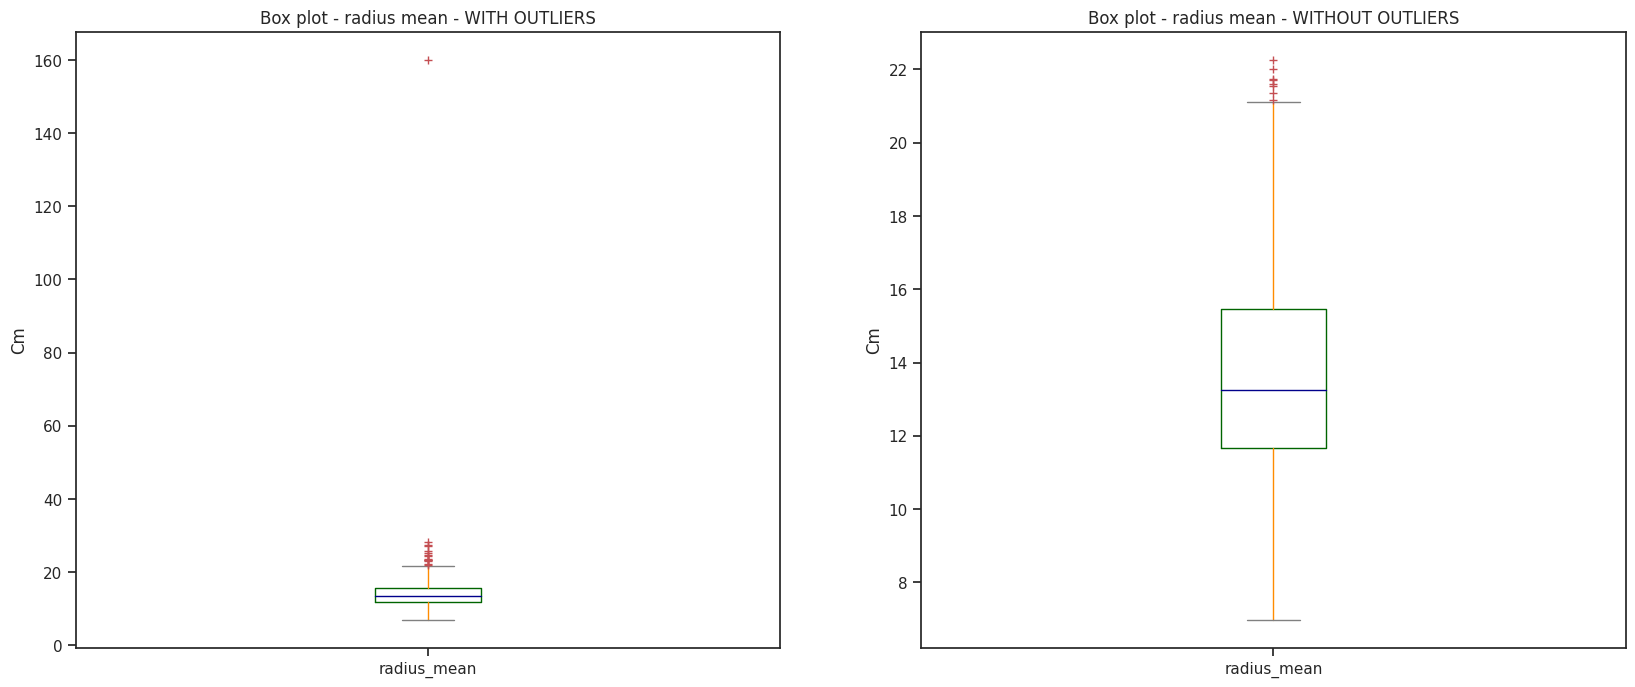

In [ ]:
#box plot - radius mean - before and after dealing with outliers

plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

box_plot = df['radius_mean'].plot.box(ax=axs[0], color=color, sym='r+');
box_plot.set_title('Box plot - radius mean - WITH OUTLIERS')
box_plot.set_ylabel('Cm')

box_plot = filtered_df['radius_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('Box plot - radius mean - WITHOUT OUTLIERS')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1200x900 with 0 Axes>

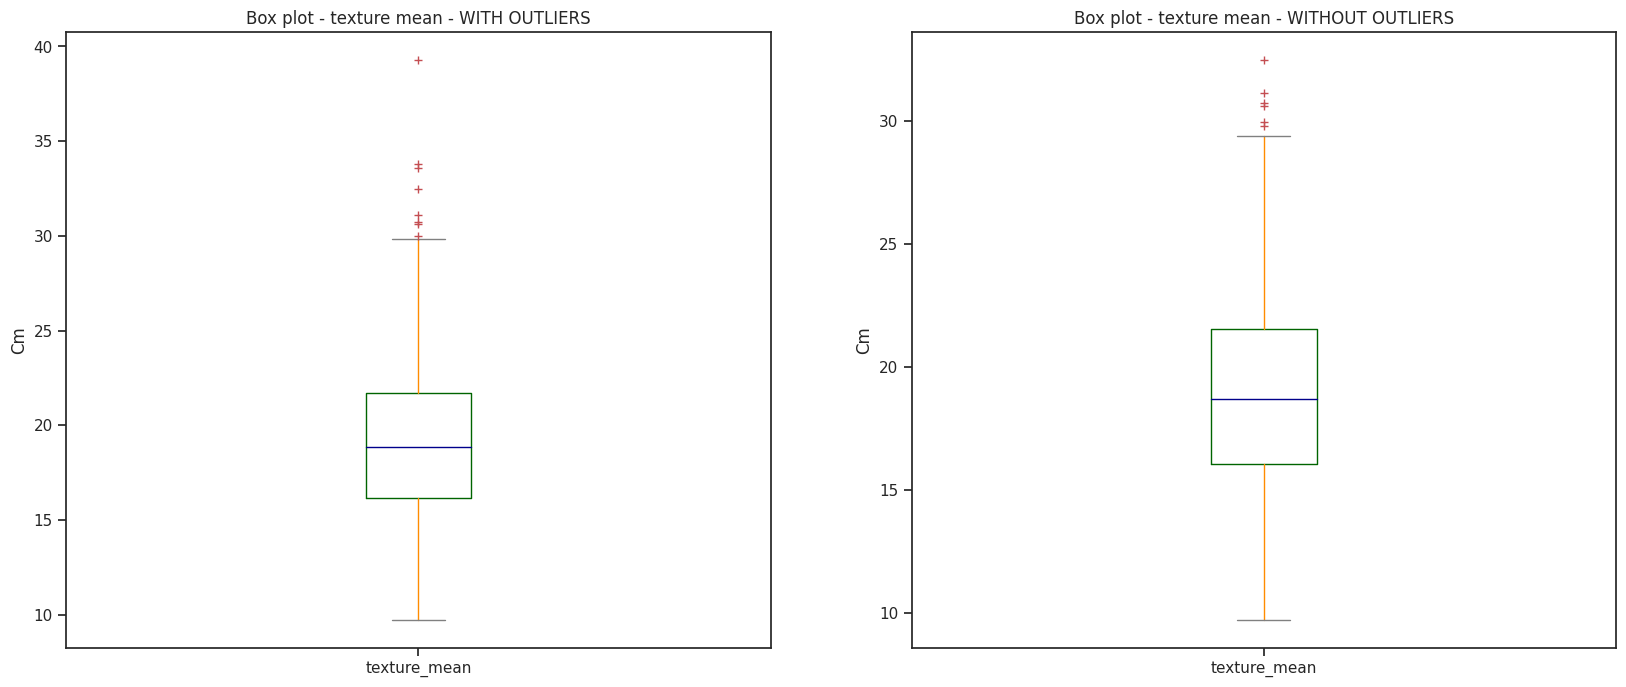

In [ ]:
#box plot - texture mean - before and after dealing with outliers

plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

box_plot = df['texture_mean'].plot.box(ax=axs[0], color=color, sym='r+');
box_plot.set_title('Box plot - texture mean - WITH OUTLIERS')
box_plot.set_ylabel('Cm')

box_plot = filtered_df['texture_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('Box plot - texture mean - WITHOUT OUTLIERS')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1200x900 with 0 Axes>

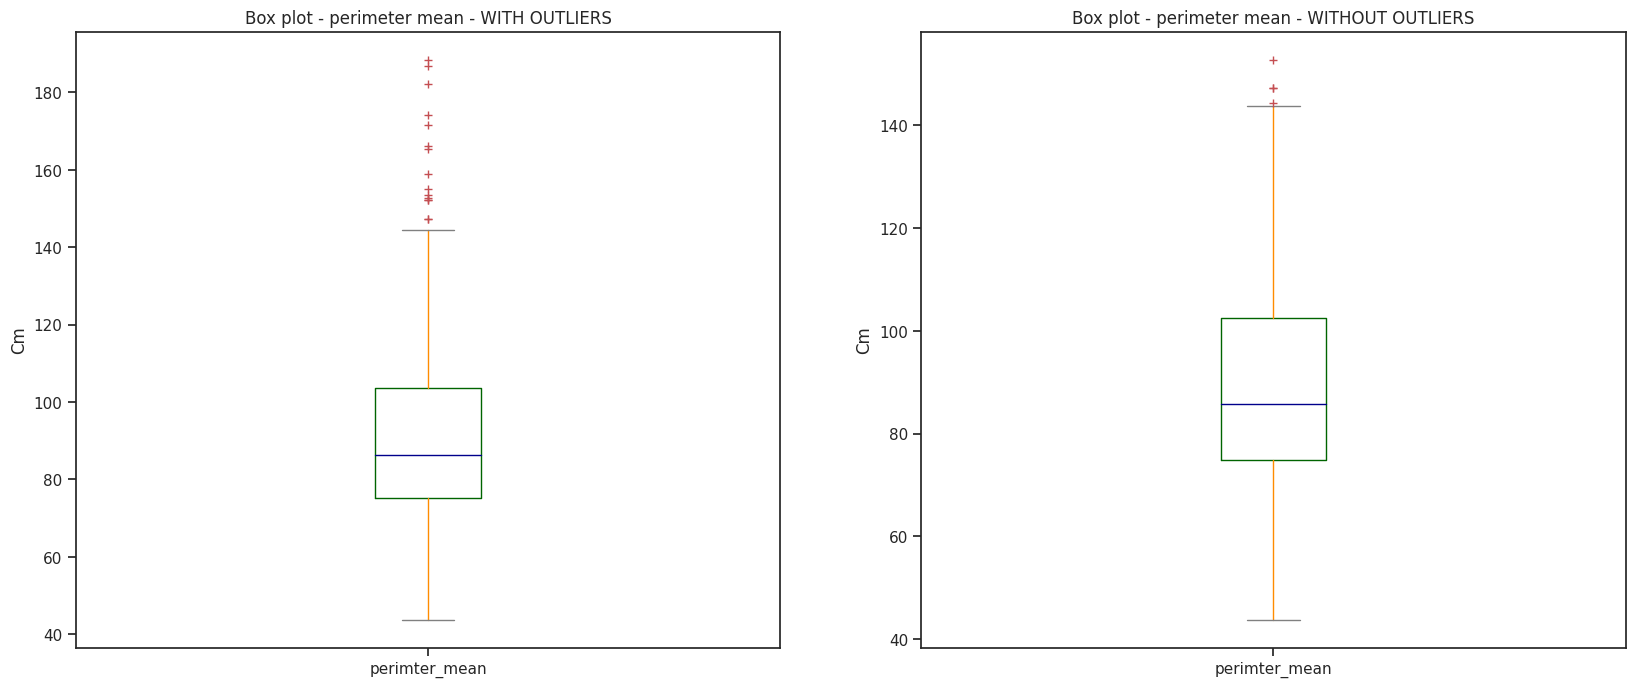

In [ ]:
#box plot - perimeter mean - before and after dealing with outliers

plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

box_plot = df['perimter_mean'].plot.box(ax=axs[0], color=color, sym='r+');
box_plot.set_title('Box plot - perimeter mean - WITH OUTLIERS')
box_plot.set_ylabel('Cm')

box_plot = filtered_df['perimter_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('Box plot - perimeter mean - WITHOUT OUTLIERS')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1200x900 with 0 Axes>

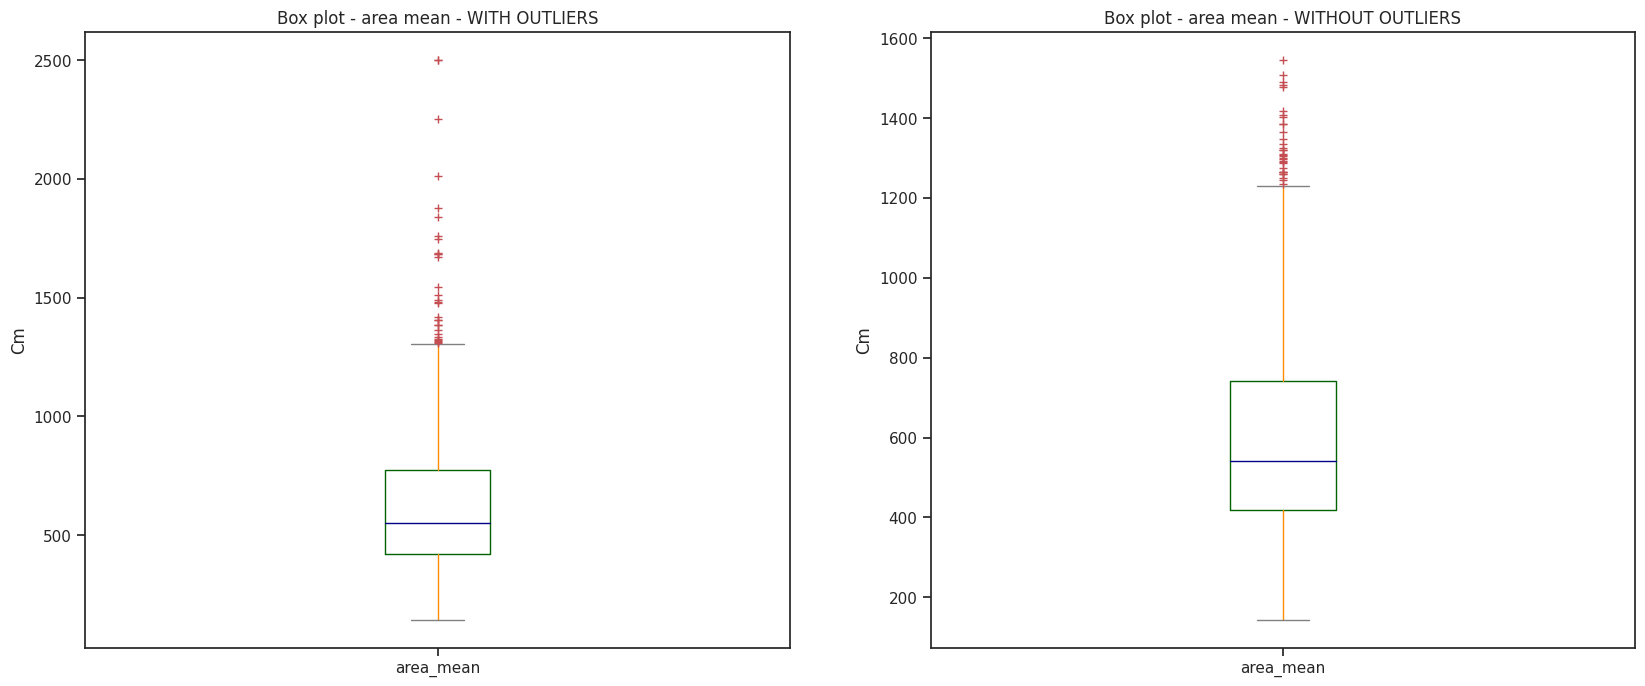

In [ ]:
#box plot - area mean - before and after dealing with outliers

plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

box_plot = df['area_mean'].plot.box(ax=axs[0], color=color, sym='r+');
box_plot.set_title('Box plot - area mean - WITH OUTLIERS')
box_plot.set_ylabel('Cm')

box_plot = filtered_df['area_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('Box plot - area mean - WITHOUT OUTLIERS')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

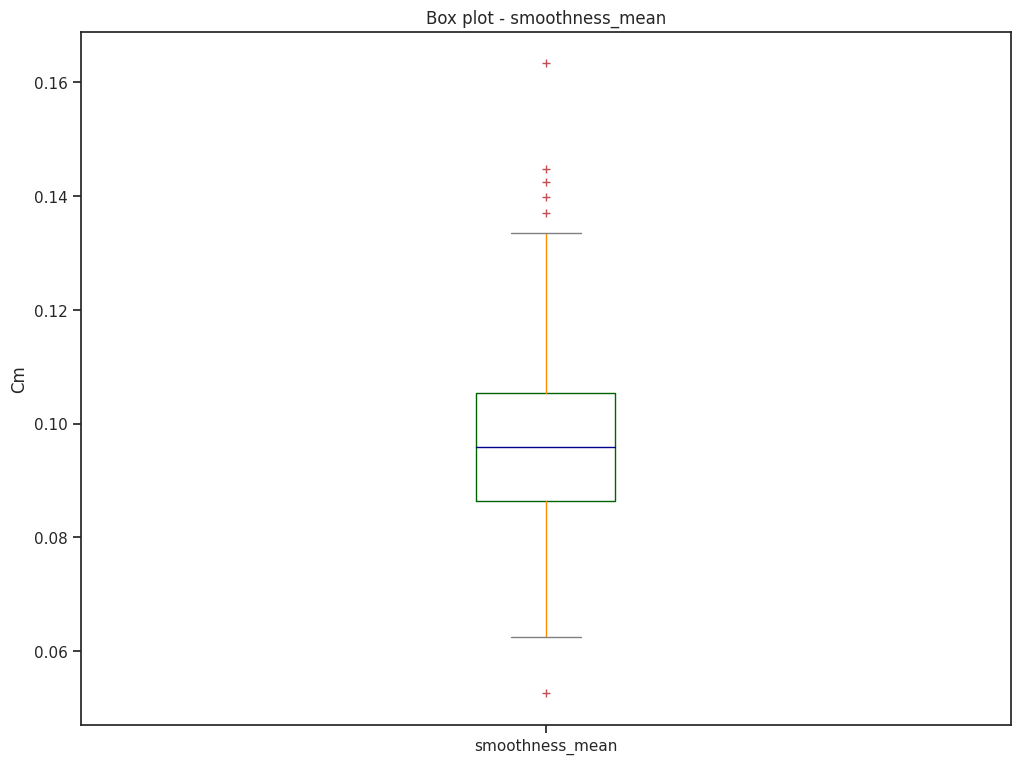

In [ ]:
#box plot - smoothness mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['smoothness_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - smoothness_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

Text(0, 0.5, 'Cm')

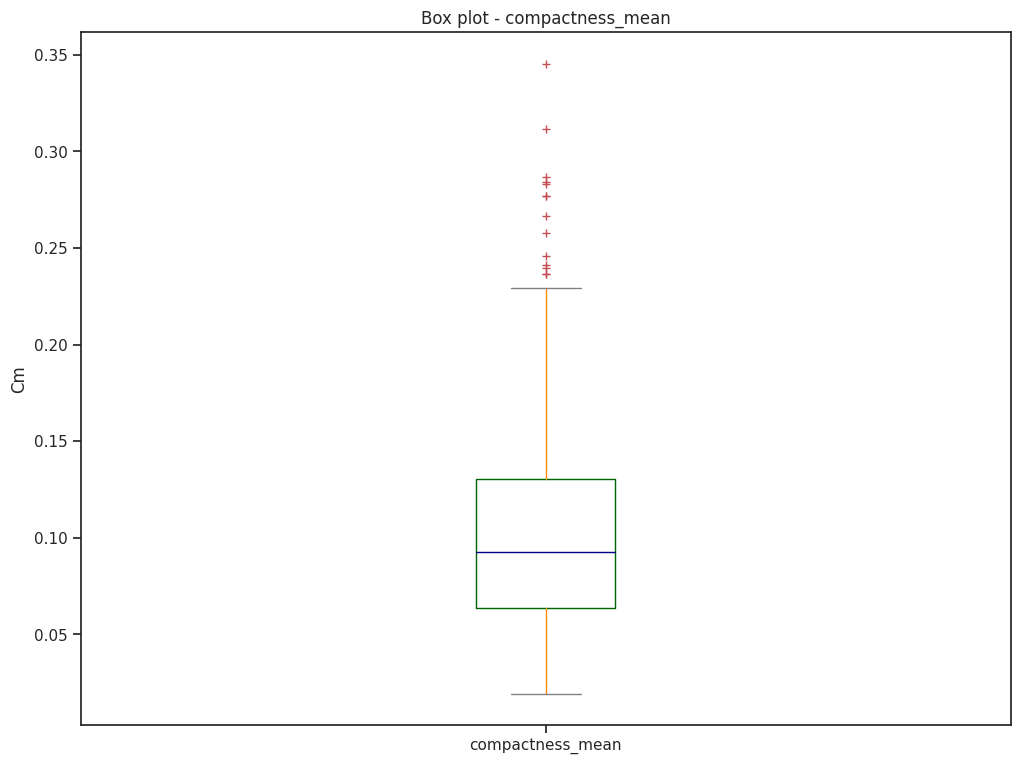

In [ ]:
#box plot - compactness mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['compactness_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - compactness_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

Text(0, 0.5, 'Cm')

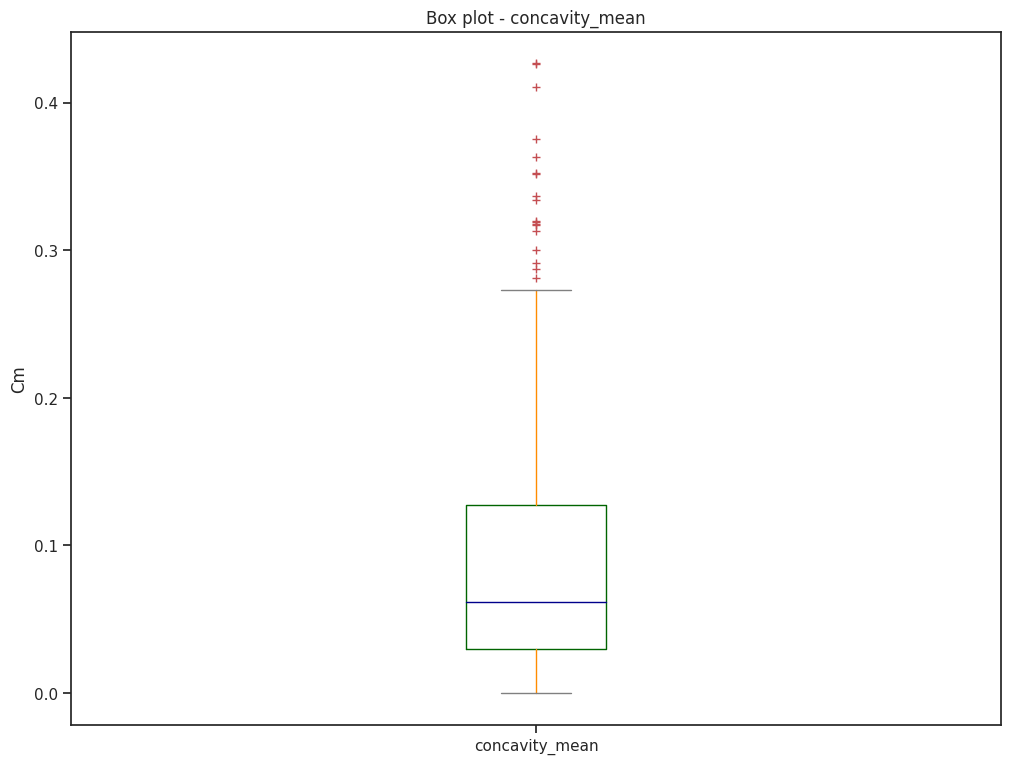

In [ ]:
#box plot - concavity mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['concavity_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - concavity_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

Text(0, 0.5, 'Cm')

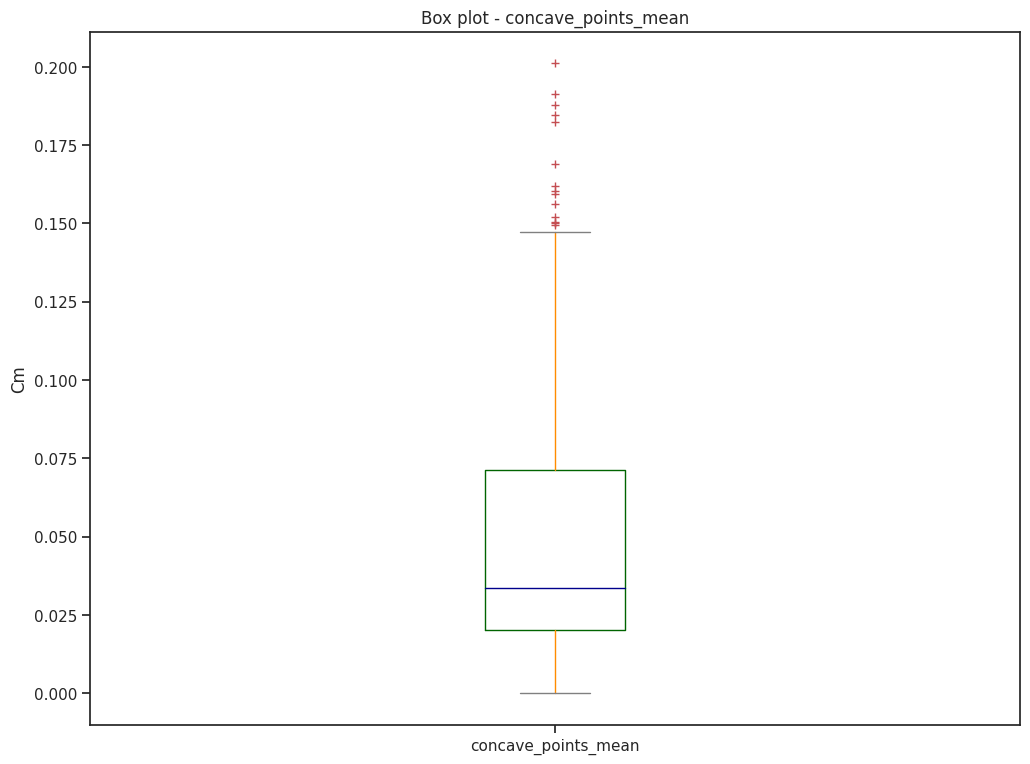

In [ ]:
#box plot - concave points mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['concave_points_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - concave_points_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

Text(0, 0.5, 'Cm')

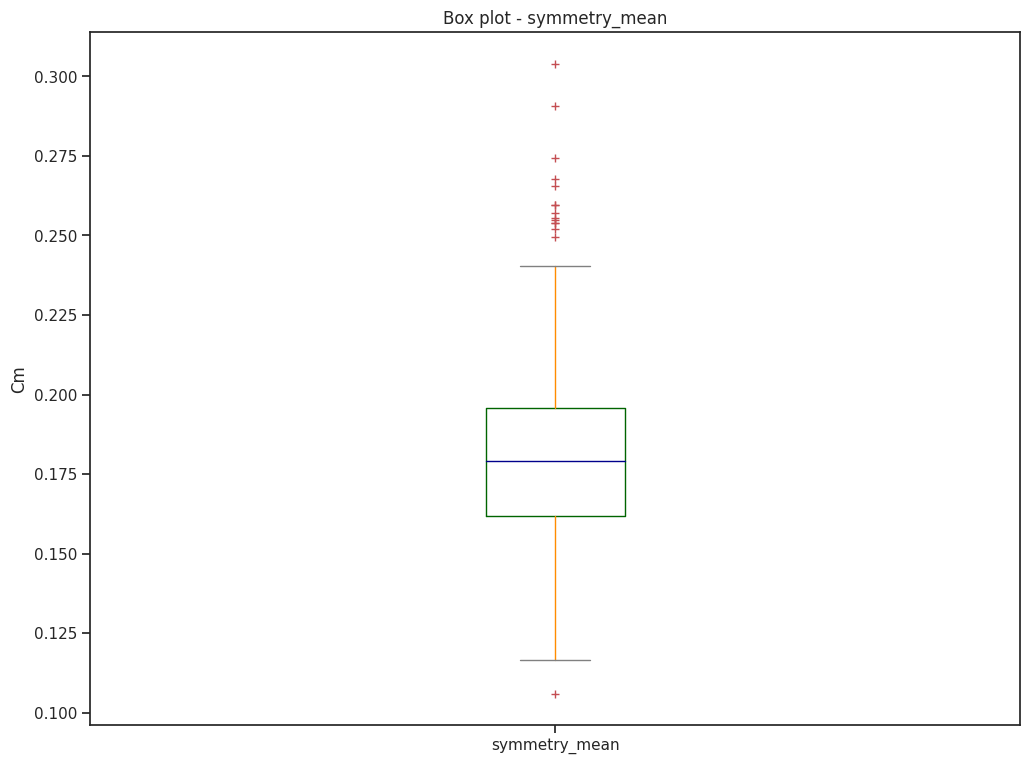

In [ ]:
#box plot - symmetry mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['symmetry_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - symmetry_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

Text(0, 0.5, 'Cm')

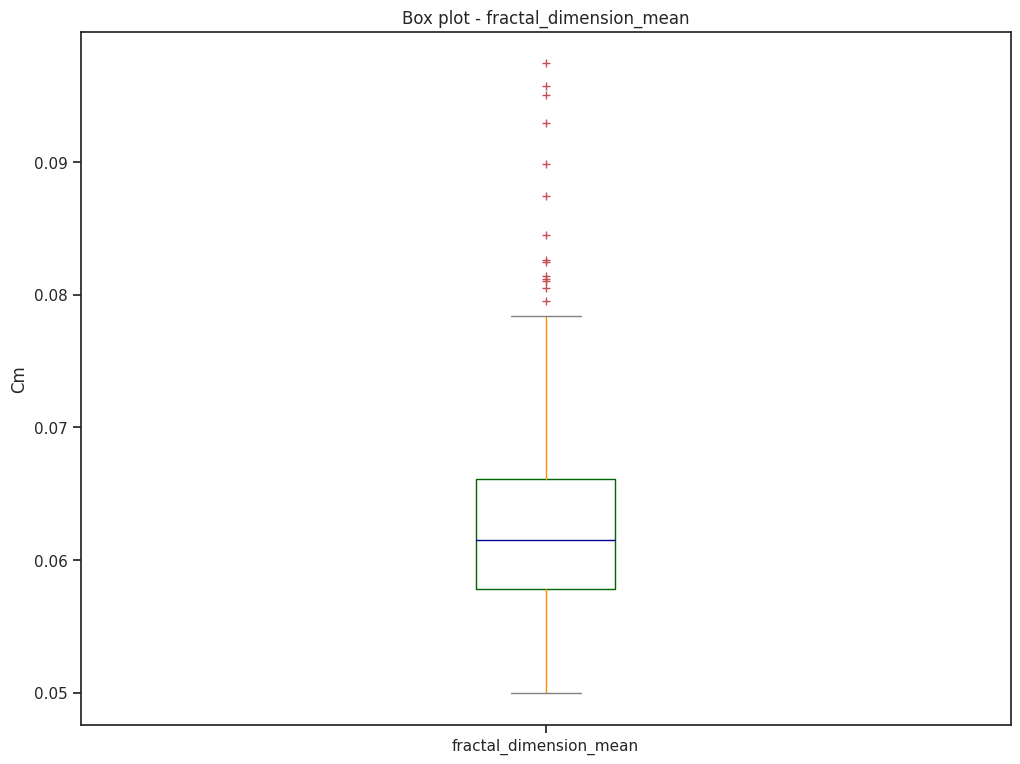

In [ ]:
#box plot - fractal dimension mean - before dealing with outliers

plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = df['fractal_dimension_mean'].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot - fractal_dimension_mean')
box_plot.set_ylabel('Cm')

####
#decided no action was necessary

[1 0]


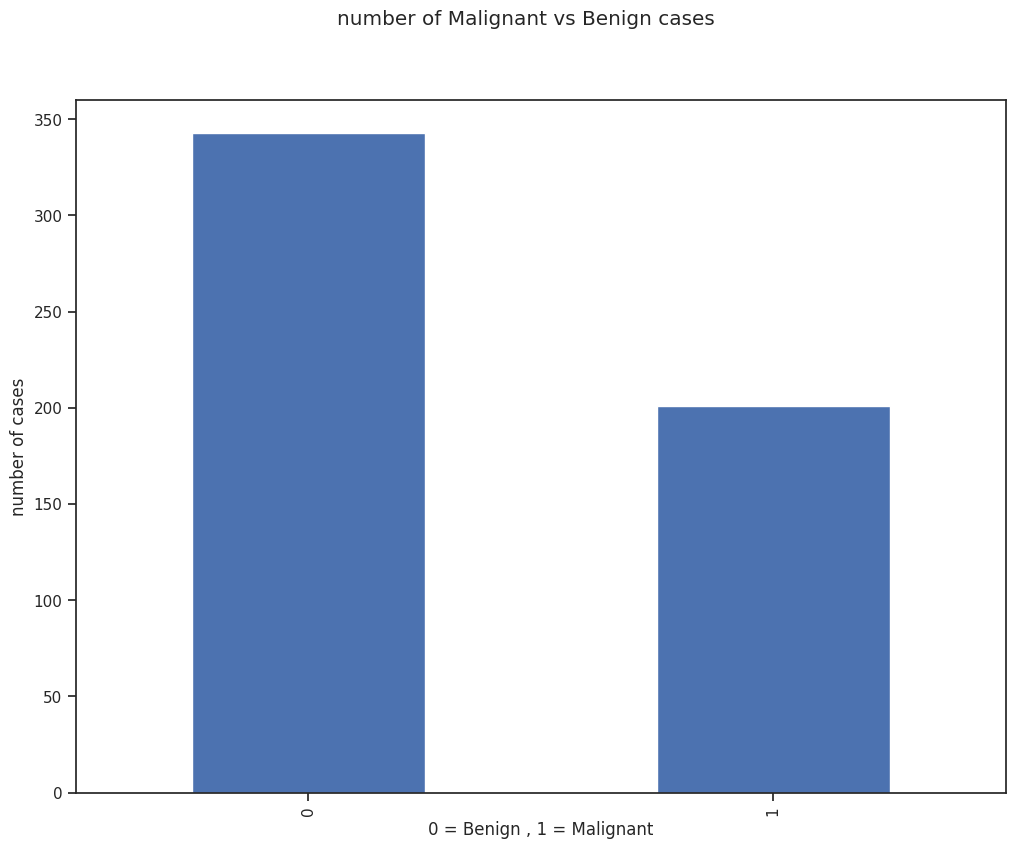

In [ ]:
#class balance

unique_values = df_imputed['class'].unique()
print(unique_values) #seeing what the values are

plt.figure();
plt.suptitle('number of Malignant vs Benign cases')
plt.xlabel('0 = Benign , 1 = Malignant')
plt.ylabel('number of cases')
df['class'].value_counts().plot(kind='bar');

Text(0, 0.5, 'Cm')

<Figure size 1000x600 with 0 Axes>

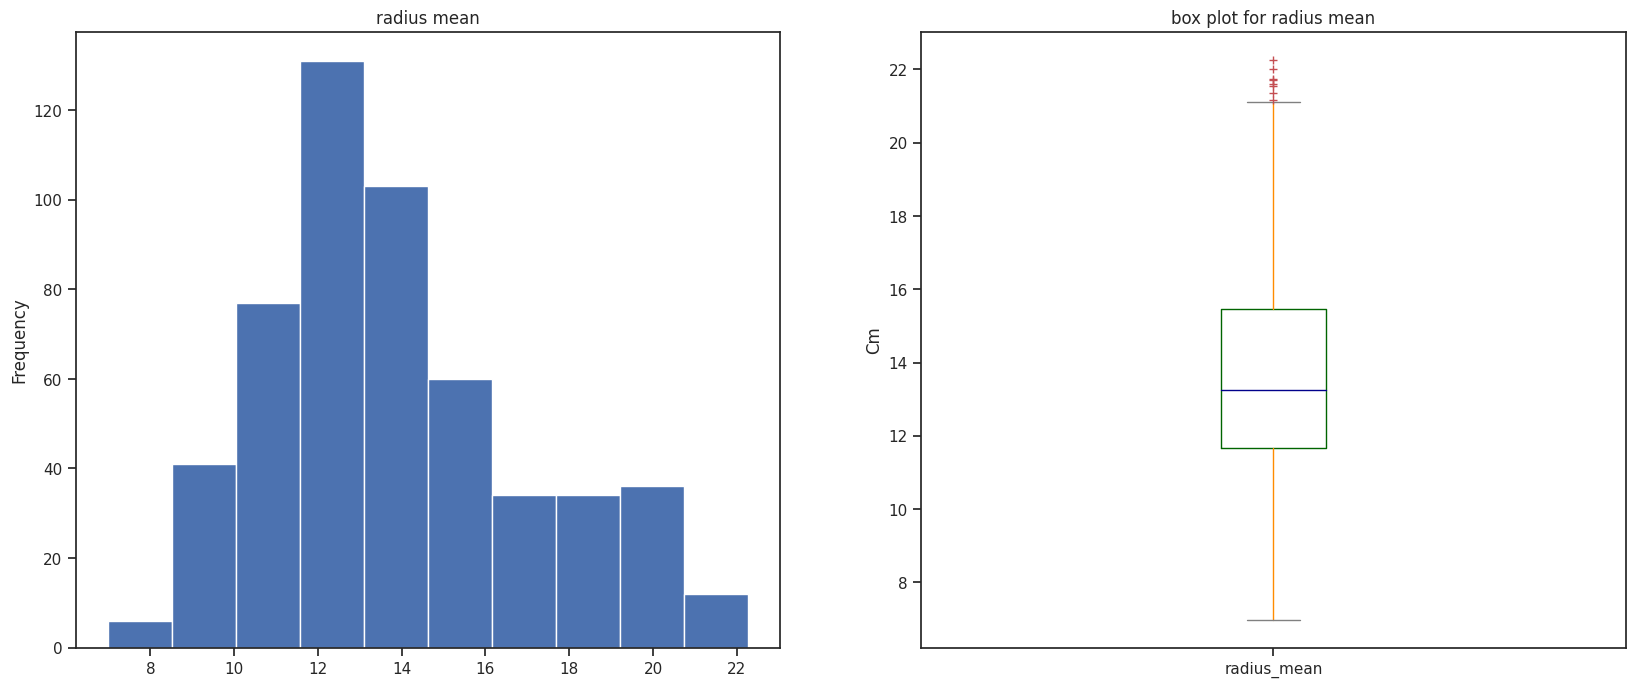

In [ ]:
#feature trends - radius mean

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

df_imputed['radius_mean'].plot(ax=axs[0], kind='hist', title='radius mean')

box_plot = df_imputed['radius_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('box plot for radius mean')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1000x600 with 0 Axes>

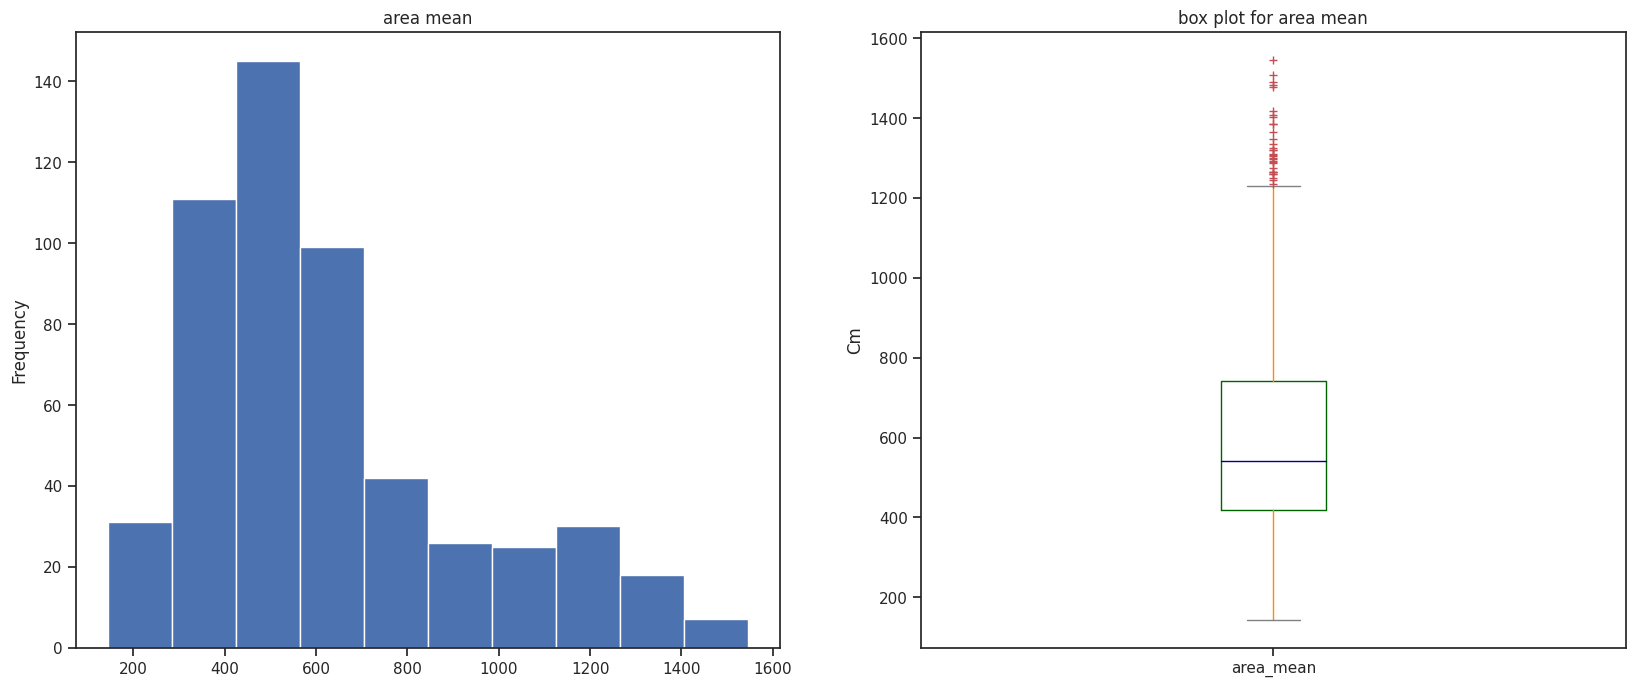

In [ ]:
#feature trends - area mean

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

df_imputed['area_mean'].plot(ax=axs[0], kind='hist', title='area mean')

box_plot = df_imputed['area_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('box plot for area mean')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1000x600 with 0 Axes>

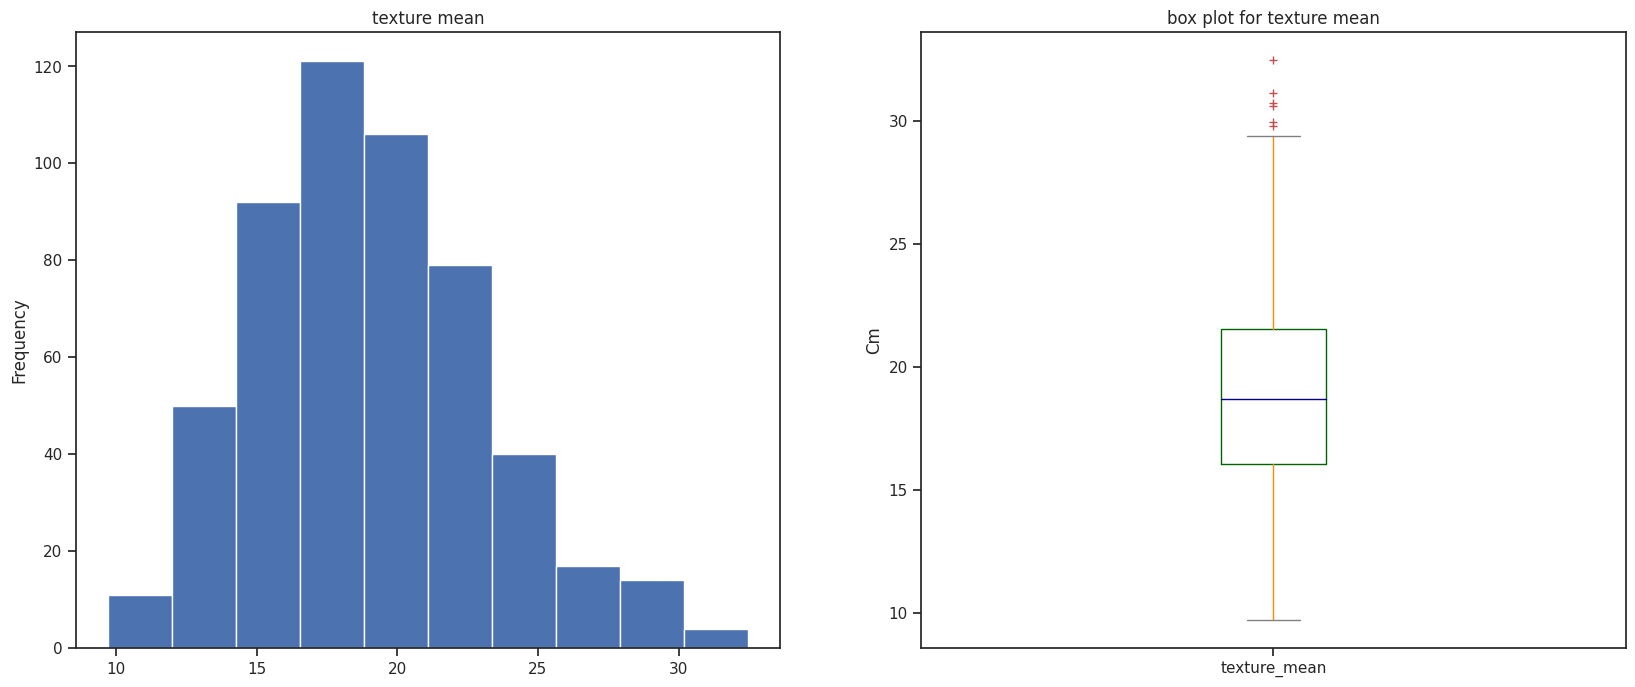

In [ ]:
#feature trends - texture mean

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df_imputed['texture_mean'].plot(ax=axs[0], kind='hist', title='texture mean')

box_plot = df_imputed['texture_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('box plot for texture mean')
box_plot.set_ylabel('Cm')

Text(0, 0.5, 'Cm')

<Figure size 1000x600 with 0 Axes>

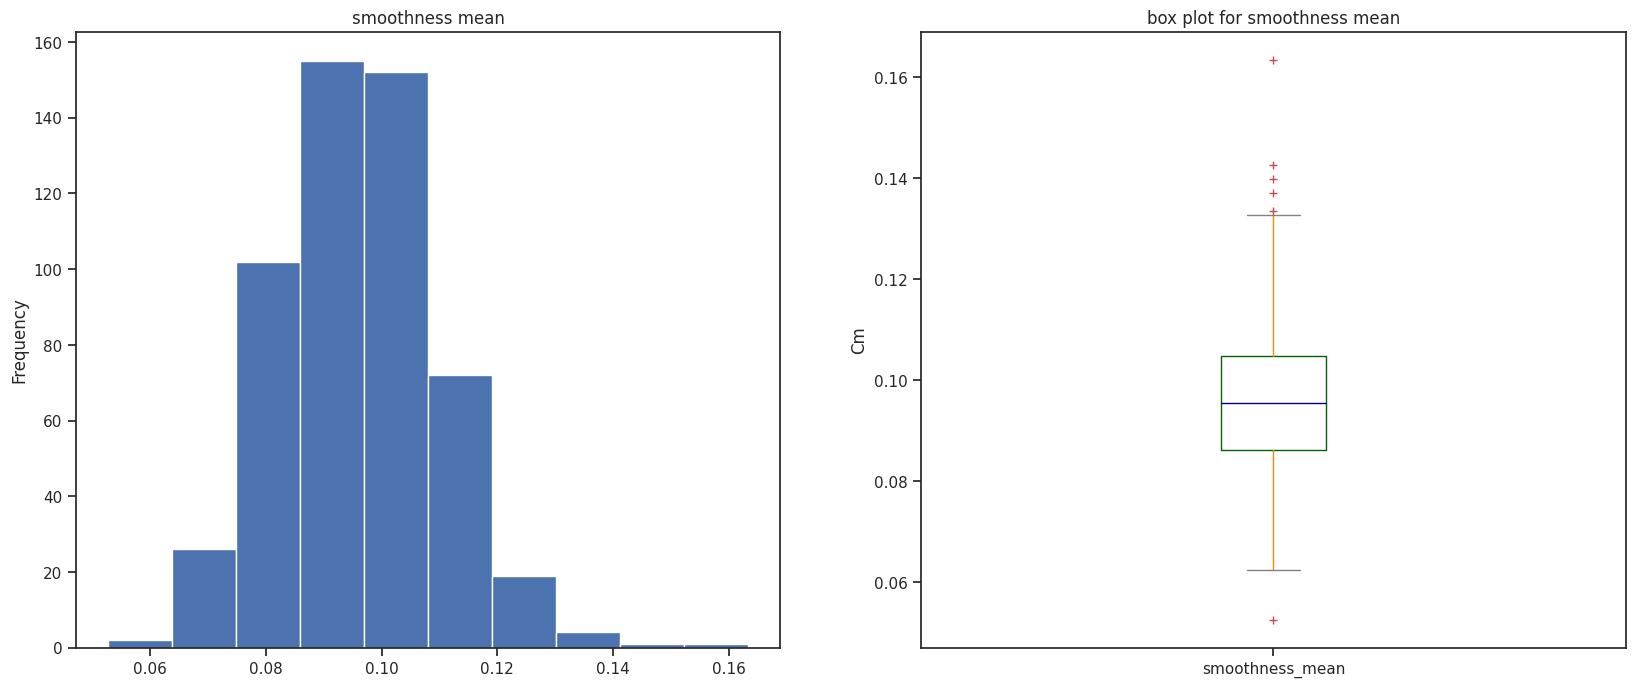

In [ ]:
#feature trends - smoothness mean

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

df_imputed['smoothness_mean'].plot(ax=axs[0], kind='hist', title='smoothness mean')

box_plot = df_imputed['smoothness_mean'].plot.box(ax=axs[1], color=color, sym='r+');
box_plot.set_title('box plot for smoothness mean')
box_plot.set_ylabel('Cm')

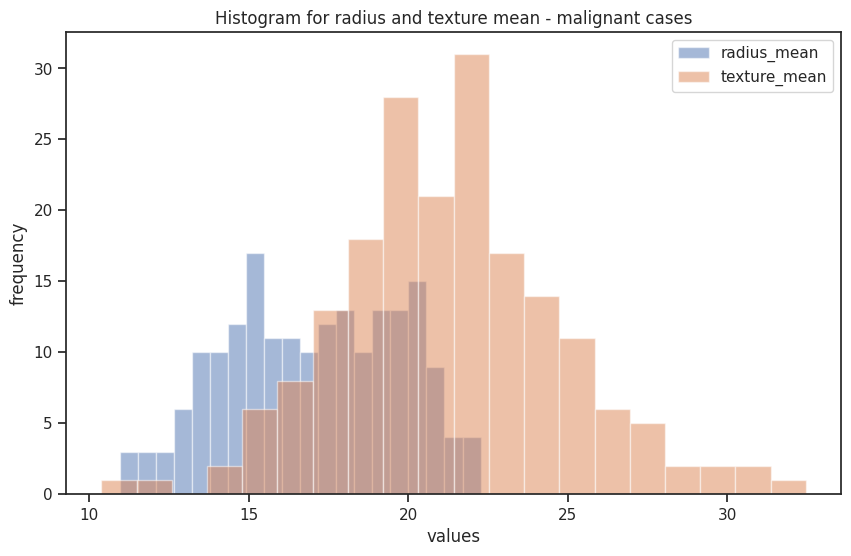

In [ ]:
#feature analysis

#radius mean vs texture mean - malignant

plt.figure(figsize=(10,6))
features = ['radius_mean', 'texture_mean']

#for malignant cases
for feature in features:
  plt.hist(malignant_df[feature], bins=20, alpha=0.5, label=feature)

plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram for radius and texture mean - malignant cases')
plt.legend()

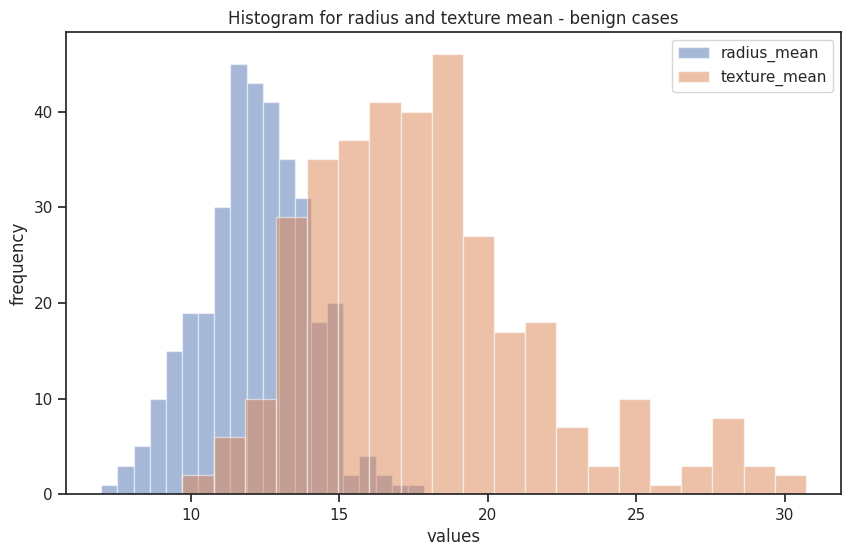

In [ ]:
#feature analysis

#radius mean vs texture mean - benign

plt.figure(figsize=(10,6))
features = ['radius_mean', 'texture_mean']

#for benign cases
for feature in features:
  plt.hist(benign_df[feature], bins=20, alpha=0.5, label=feature)

plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram for radius and texture mean - benign cases')
plt.legend()

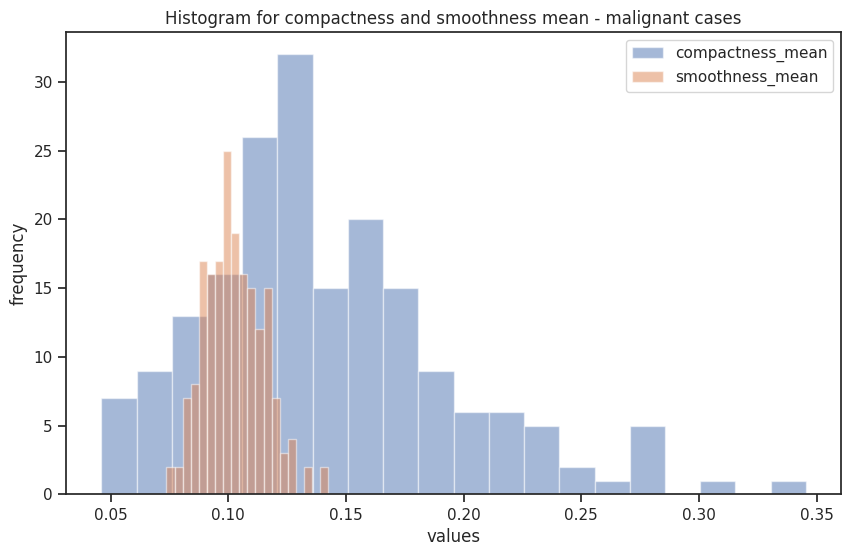

In [ ]:
#feature analysis

#compactness mean vs smoothness mean - malignant

plt.figure(figsize=(10,6))
features = ['compactness_mean', 'smoothness_mean']

#for malignant cases
for feature in features:
  plt.hist(malignant_df[feature], bins=20, alpha=0.5, label=feature)

plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram for compactness and smoothness mean - malignant cases')
plt.legend()

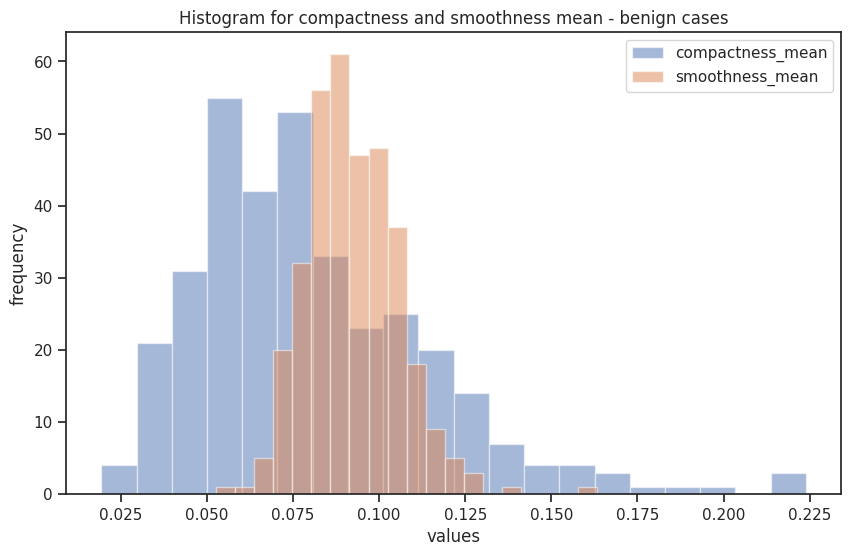

In [ ]:
#feature analysis

#compactness mean vs smoothness mean - benign

plt.figure(figsize=(10,6))
features = ['compactness_mean', 'smoothness_mean']

#for benign cases
for feature in features:
  plt.hist(benign_df[feature], bins=20, alpha=0.5, label=feature)

plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram for compactness and smoothness mean - benign cases')
plt.legend()

<Figure size 1200x900 with 0 Axes>

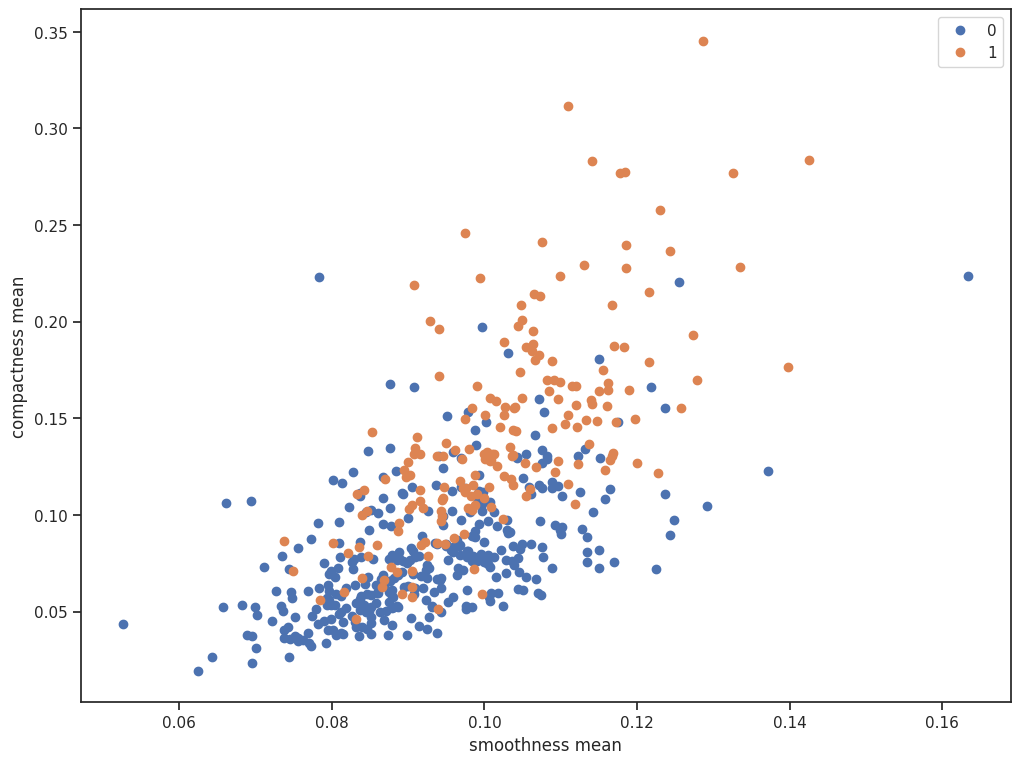

In [ ]:
#smoothness mean vs compactness mean in M vs B cases (scatter graph)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05)

# group the data instances according to the different classes they belong to
groups = df_imputed.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.smoothness_mean, group.compactness_mean, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('smoothness mean')
ax.set_ylabel('compactness mean')

# add legend to the figure
ax.legend()

<Figure size 1200x900 with 0 Axes>

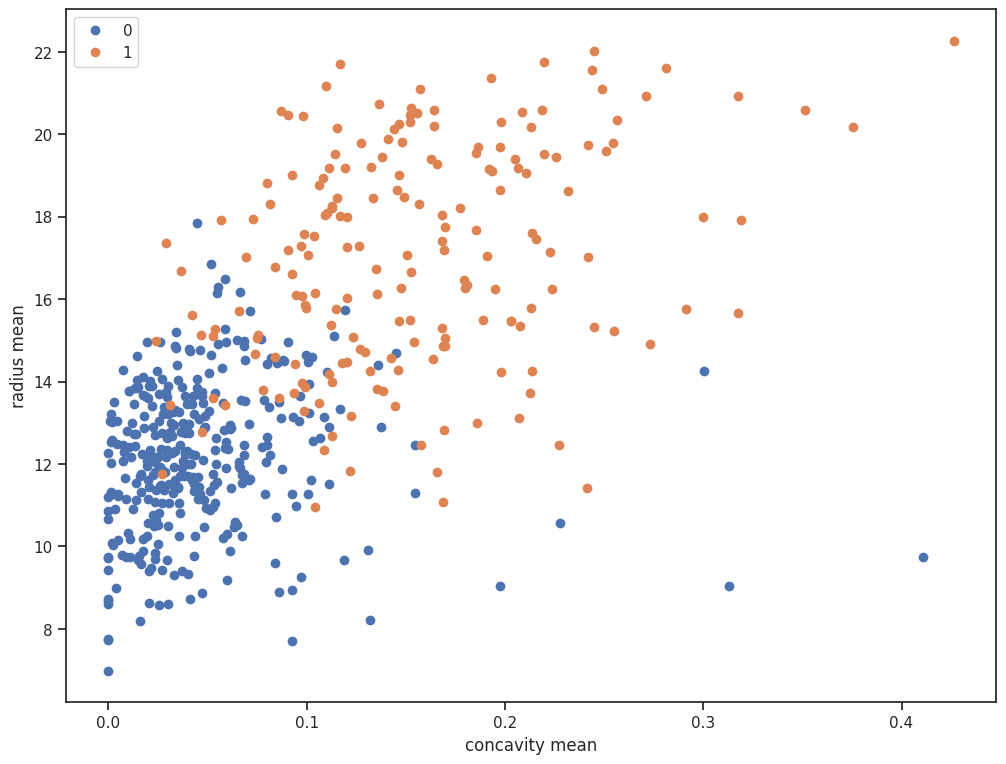

In [ ]:
#concavity mean vs radius mean in M vs B cases (scatter graph)

fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05)

# group the data instances according to the different classes they belong to
groups = df_imputed.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.concavity_mean, group.radius_mean, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('concavity mean')
ax.set_ylabel('radius mean')

# add legend to the figure
ax.legend()

<Figure size 1200x900 with 0 Axes>

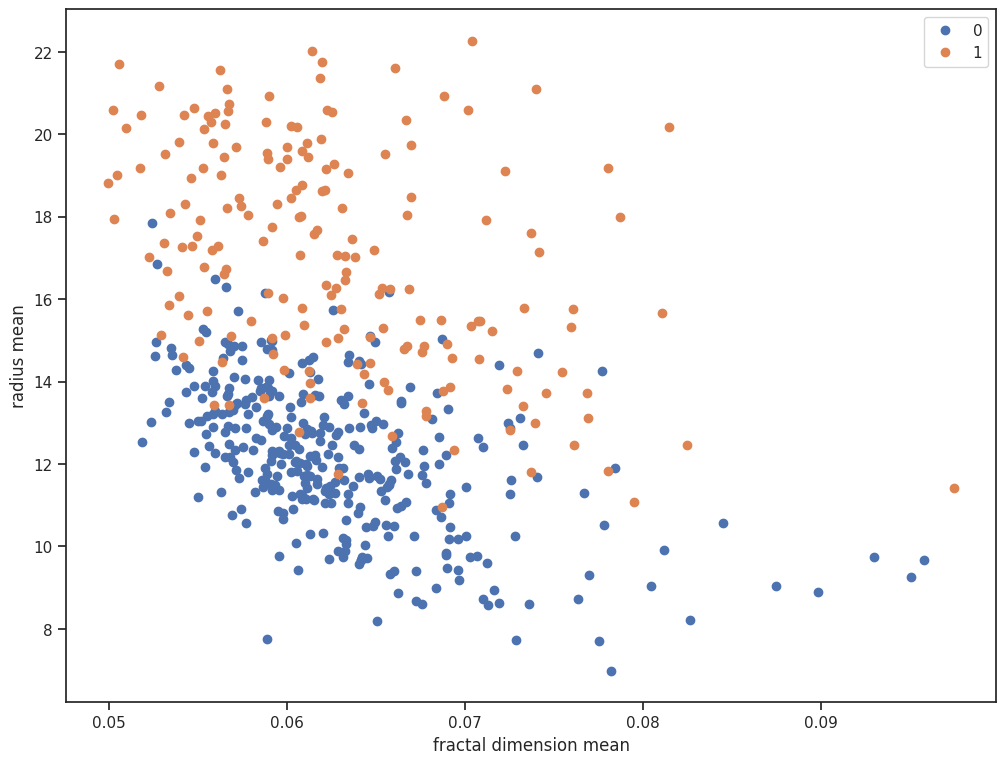

In [ ]:
#fractal dimension mean vs radius mean in M vs B cases (scatter graph)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05)

# group the data instances according to the different classes they belong to
groups = df_imputed.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.fractal_dimension_mean, group.radius_mean, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('fractal dimension mean')
ax.set_ylabel('radius mean')

# add legend to the figure
ax.legend()

<Figure size 1200x900 with 0 Axes>

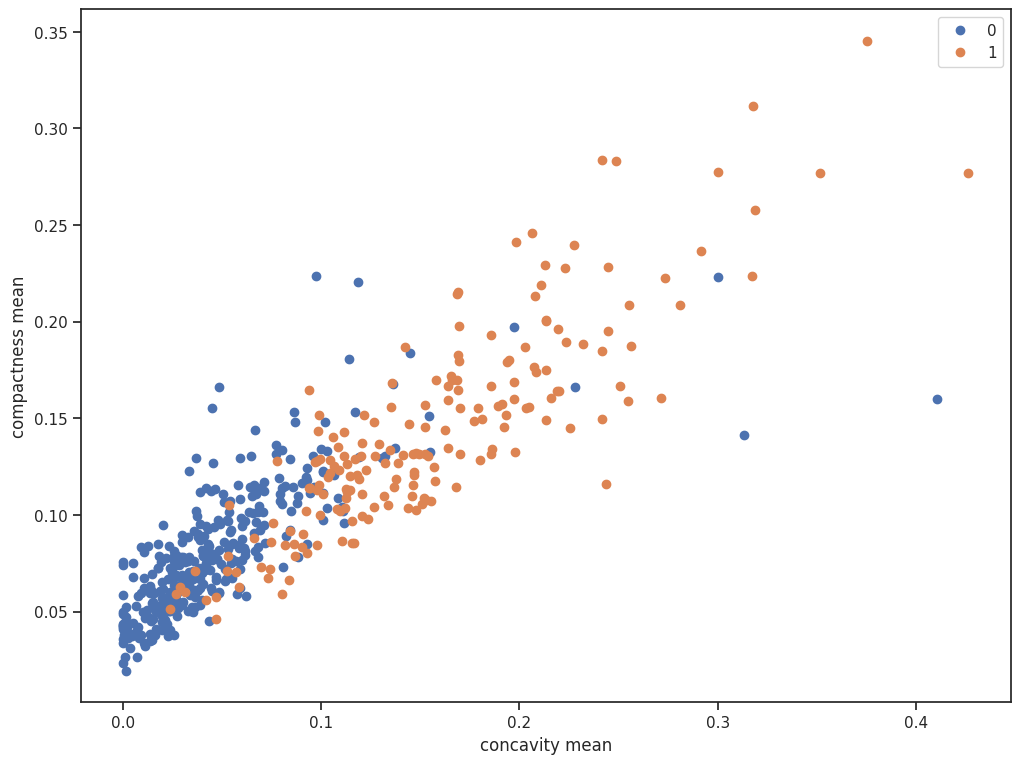

In [ ]:
#farctal dimension concavity vs compactness mean in M vs B cases (scatter graph)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = df_imputed.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.concavity_mean, group.compactness_mean, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('concavity mean')
ax.set_ylabel('compactness mean')

# add legend to the figure
ax.legend()

<Axes: >

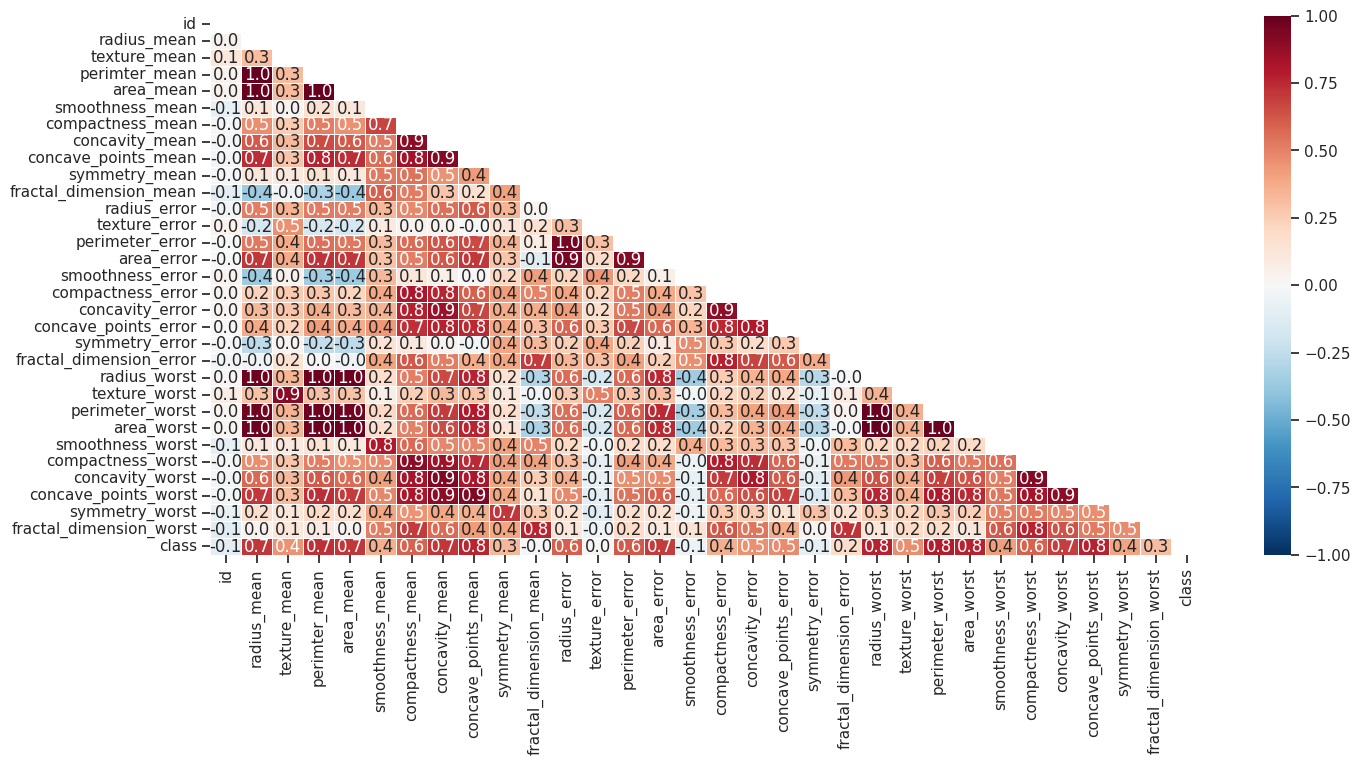

In [ ]:
# Using Sparman's (non-linear relationship)

corr = df_imputed.corr(method='spearman')
#corr, _ = spearmanr(X)

# Getting just the triangle of the correlation matrix
triangle = np.triu(corr)

# Plotting a heatmap with Seaborn
plt.figure(figsize=(16, 7))
sns.heatmap(data=corr, annot=True, mask=triangle, vmin=-1, vmax=1, cmap='RdBu_r', linewidths=.5, fmt= '.1f') # with 1 decimal precision

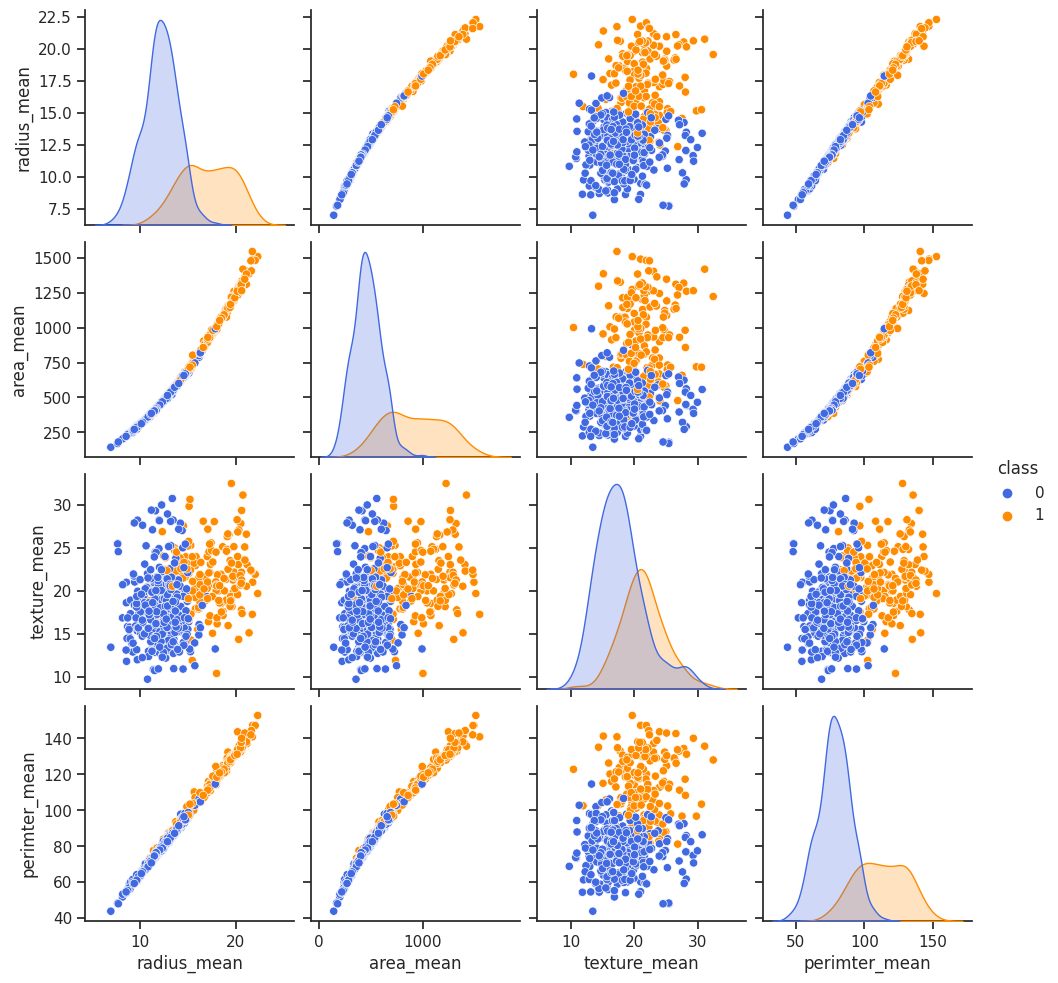

In [ ]:
#radius, area, texture and perimeter as a scatter matrix

features = ['radius_mean', 'area_mean', 'texture_mean', 'perimter_mean']
sns.set(style="ticks")
custom_palette = {1: "darkorange", 0: "royalblue"}
sns.pairplot(df_imputed[features + ['class']], hue="class", palette=custom_palette)

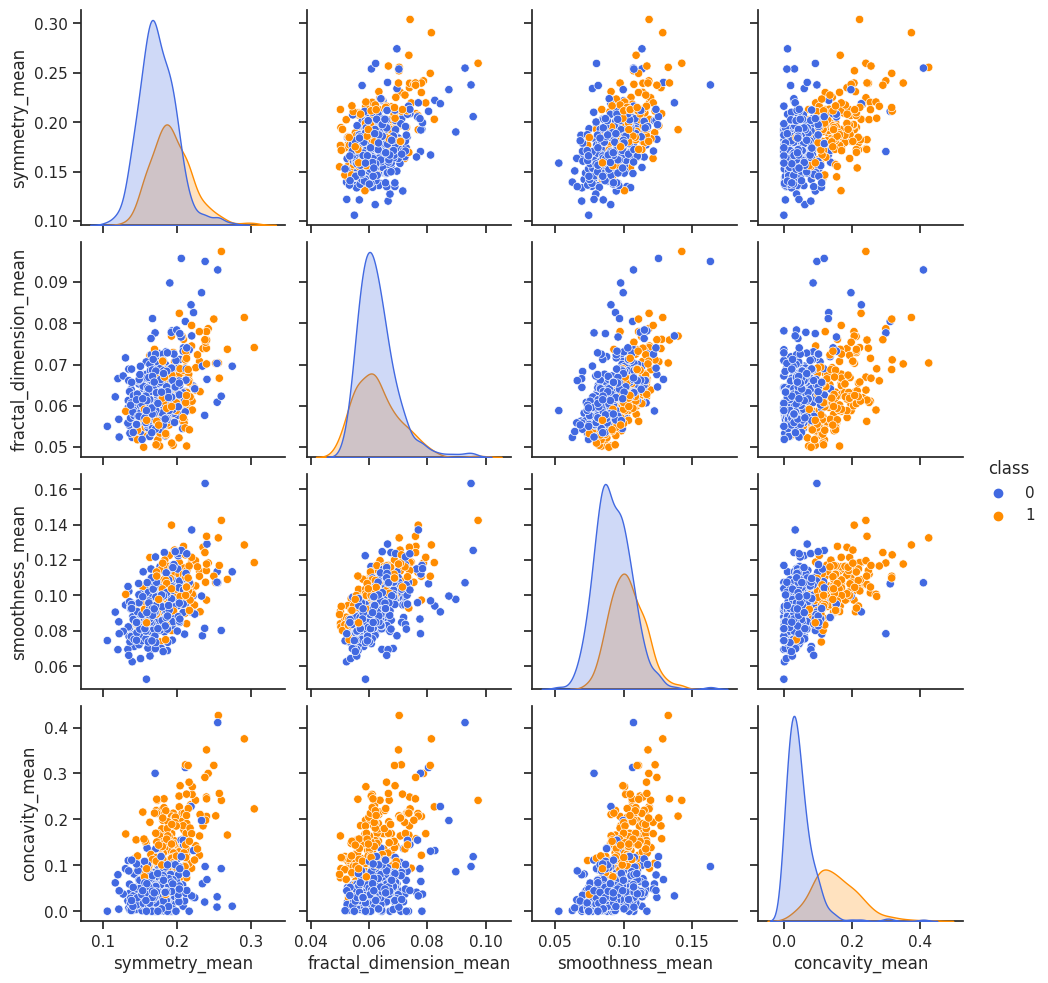

In [ ]:
#symmetry, fractal dimension, smoothness and concavity as a scatter matrix

features = ['symmetry_mean', 'fractal_dimension_mean', 'smoothness_mean', 'concavity_mean']
sns.set(style="ticks")
custom_palette = {1: "darkorange", 0: "royalblue"}
sns.pairplot(df_imputed[features + ['class']], hue="class", palette=custom_palette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


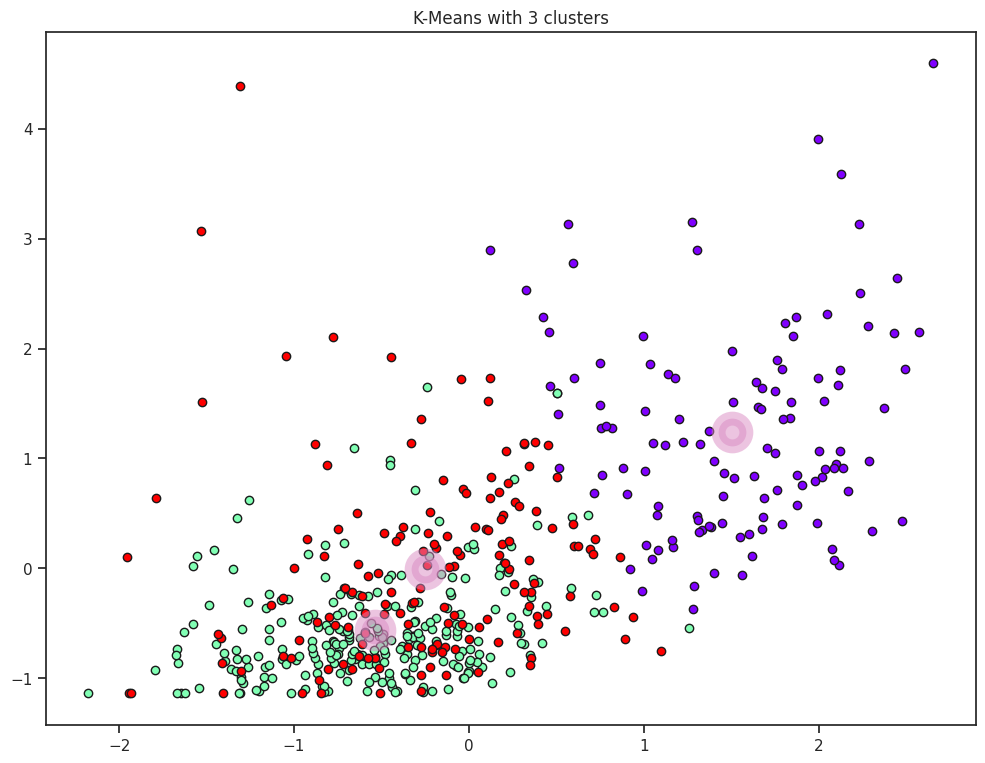

In [ ]:
#clustering - K-Means

def plot_cluster_graph(X, y_pred, core_samples_mask, algorithm_name, n_clusters, cluster_centres=None):

    plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 9)})

    unique_labels = set(y_pred)

    colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [1, 1, 1, 1] # white for noise

        class_member_mask = (y_pred == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    # plots centroids, if provided
    if cluster_centres is not None:
        plt.plot(cluster_centres[:,0], cluster_centres[:,1], 'o', mew=10, ms=20, alpha=0.5)

    plt.title('%s with %d clusters' % (algorithm_name, n_clusters))
    plt.show()

X_blobs = df_imputed[['radius_mean', 'concavity_mean', 'area_mean', 'texture_mean']]
X_blobs = StandardScaler().fit_transform(X_blobs)

model = KMeans(n_clusters=3)
model = model.fit(X_blobs)
labels = model.labels_
cluster_centres = model.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# plot graph

plot_cluster_graph(X_blobs, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [ ]:
#removing outliers

radius_max = 38
texture_max = 33
perimeter_max = 160
area_max = 1600

filtered_df = df[(df['radius_mean'] <= radius_max) & (df['texture_mean'] <= texture_max) & (df['perimter_mean'] <= perimeter_max) & (df['area_mean'] <= area_max)]

In [ ]:
# imputing the missing values using mean

df_imputed = filtered_df.fillna(df.mean())

<ipython-input-8-5a64829d1595>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = filtered_df.fillna(df.mean())


In [ ]:
#mapping M & B to 1 & 0

df_imputed['class'] = df_imputed['class'].map({'M': 1, 'B': 0})

In [ ]:
#splitting dataset into M and B

malignant_df = df_imputed[df_imputed['class'] == 1]
benign_df = df_imputed[df_imputed['class'] == 0]


## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

<ipython-input-12-76234edbbfdc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
<ipython-input-12-76234edbbfdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values


In [ ]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 55.04587155963303


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [ ]:
#K-NN classifier (using the imputed dataset - to deal with missing values) (Sklearn)

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y) (same as other workflow)
X = df_imputed.iloc[:,:len(df.columns)-1]
y = df_imputed.iloc[:,len(df.columns)-1]

# Instantiating model
k = 5
model = KNeighborsClassifier(n_neighbors = k)

#defining scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

#arrays for holding results
accuracy_list_knn = np.array([])
precision_list_knn = np.array([])
recall_list_knn = np.array([])

#loop for testing 1000 times
for x in range(1000):

    # Splitting dataset for hold-out validation
    X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=None,
                                                    stratify=y
                                                   )

    # Training the model
    model.fit(X_train, y_train)

    # Testing the model
    y_pred = model.predict(X_test)

    #append accuracy array
    accuracy_list_knn = np.append(accuracy_list_knn, accuracy_score(y_test, y_pred))
    precision_list_knn = np.append(precision_list_knn, accuracy_score(y_test, y_pred))
    recall_list_knn = np.append(recall_list_knn, accuracy_score(y_test, y_pred))



# Printing out performance of the model
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f" % accuracy)
print("Precision: %0.2f" % precision_macro)
print("Recall:    %0.2f" % recall_macro)

[[62  7]
 [21 17]]
Accuracy:  0.32
Precision: 0.31
Recall:    0.43


In [ ]:
#utility function - to report best scores (from lab solutions)

def report(results, rank_metric='score', n_top=3):
  print("\nModels ranked according to", rank_metric)
  for i in range(1, n_top + 1):
    candidates = np.flatnonzero(results["rank_test_"+rank_metric] == 1)
    for candidate in candidates:
      print("model with rank: {0}".format(1))
      print("mean validation score: {0: 0.2f} (+/- {1: 0.2f})".format(
          results["mean_test_" + rank_metric] [candidate],
          results["std_test_" + rank_metric] [candidate] * 2))

      print("Params: {0}".format(results['params'][candidate]))
      print("")

In [ ]:
#Decision tree classifier - hyper parameter tuning

# Instantiating model
model = DecisionTreeClassifier()

#hyper-parameters
param_grid = {"max_depth": [2,3,4,5,6,7,8,9,10],
              "max_features": [2,3,4,5,6,7,8,9,10],
              "criterion": ['gini', 'entropy', 'log_loss'],
              "splitter": ['best', 'random']}

#initialising grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)

#start search
start_time = time()
grid_search.fit(X,y)
end_time = time()

#print results

number_of_candidate_solutions = len(grid_search.cv_results_['params'])

print("\nGrid Search took %0.2f seconds for %d candidates "
      "parameter settings." % ((end_time - start_time), number_of_candidate_solutions))
report(grid_search.cv_results_)



Grid Search took 27.46 seconds for 486 candidates parameter settings.

Models ranked according to score
model with rank: 1
mean validation score:  0.96 (+/-  0.04)
Params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 10, 'splitter': 'best'}

model with rank: 1
mean validation score:  0.96 (+/-  0.04)
Params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 10, 'splitter': 'best'}

model with rank: 1
mean validation score:  0.96 (+/-  0.04)
Params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 10, 'splitter': 'best'}



In [ ]:
#decision tree classifier

model = DecisionTreeClassifier(random_state=None,
                               criterion='log_loss',
                               max_depth=9, max_features=2,
                               splitter='best')

#defining scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

#array for holding accuracy results
accuracy_list_dt = np.array([])
precision_list_dt = np.array([])
recall_list_dt = np.array([])

#loop for testing 1000 times
for x in range(1000):

    # Splitting dataset for hold-out validation
    X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=None,
                                                    stratify=y
                                                   )

    # Training the model
    model.fit(X_train, y_train)

    # Testing the model
    y_pred = model.predict(X_test)

    #append accuracy array
    accuracy_list_dt = np.append(accuracy_list_dt, accuracy_score(y_test, y_pred))
    precision_list_dt = np.append(precision_list_dt, accuracy_score(y_test, y_pred))
    recall_list_dt = np.append(recall_list_dt, accuracy_score(y_test, y_pred))

# Printing out performance of the model
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f" % accuracy)
print("Precision: %0.2f" % precision_macro)
print("Recall:    %0.2f" % recall_macro)

[[63  6]
 [ 5 33]]
Accuracy:  0.74
Precision: 0.73
Recall:    0.67


In [ ]:
#random forest classifier - hyperparameter tuning

# Instantiating model
model = RandomForestClassifier()

#hyper-parameters
param_grid = {"n_estimators": [2,3,4,5,6,7,8,9,10],
              "max_features": [2,3,4,5,6,7,8,9,10],
              "criterion": ['gini', 'entropy', 'log_loss']}

#initialising grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)

#start search
start_time = time()
grid_search.fit(X,y)
end_time = time()

#print results

number_of_candidate_solutions = len(grid_search.cv_results_['params'])

print("\nGrid Search took %0.2f seconds for %d candidates "
      "parameter settings." % ((end_time - start_time), number_of_candidate_solutions))
report(grid_search.cv_results_)



Grid Search took 64.66 seconds for 243 candidates parameter settings.

Models ranked according to score
model with rank: 1
mean validation score:  0.97 (+/-  0.08)
Params: {'criterion': 'entropy', 'max_features': 6, 'n_estimators': 5}

model with rank: 1
mean validation score:  0.97 (+/-  0.08)
Params: {'criterion': 'entropy', 'max_features': 6, 'n_estimators': 5}

model with rank: 1
mean validation score:  0.97 (+/-  0.08)
Params: {'criterion': 'entropy', 'max_features': 6, 'n_estimators': 5}



In [ ]:
#random forest classifier

model = RandomForestClassifier(random_state=None,
                               criterion='entropy',
                               max_features=6,
                               n_estimators=5)

#defining scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

#array for holding accuracy results
accuracy_list_rf = np.array([])
precision_list_rf = np.array([])
recall_list_rf = np.array([])


#loop for testing 1000 times
for x in range(1000):

    # Splitting dataset for hold-out validation
    X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=None,
                                                    stratify=y
                                                   )

    # Training the model
    model.fit(X_train, y_train)

    # Testing the model
    y_pred = model.predict(X_test)

    #append accuracy array
    accuracy_list_rf = np.append(accuracy_list_rf, accuracy_score(y_test, y_pred))
    precision_list_rf = np.append(precision_list_rf, accuracy_score(y_test, y_pred))
    recall_list_rf = np.append(recall_list_rf, accuracy_score(y_test, y_pred))

# Printing out performance of the model
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f" % accuracy)
print("Precision: %0.2f" % precision_macro)
print("Recall:    %0.2f" % recall_macro)

[[68  1]
 [ 3 35]]
Accuracy:  0.90
Precision: 0.89
Recall:    0.89


In [ ]:
#MLP classifier - hyperparameter tuning

# Instantiating model
model = MLPClassifier()

#hyper-parameters
param_grid = {"max_iter": [100, 200, 300, 400, 500],
              "activation": ['identity', 'logistic', 'tanh', 'relu'],
              "learning_rate": ['constant', 'invscaling', 'adaptive']}

#initialising grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)

#start search
start_time = time()
grid_search.fit(X,y)
end_time = time()

#print results

number_of_candidate_solutions = len(grid_search.cv_results_['params'])

print("\nGrid Search took %0.2f seconds for %d candidates "
      "parameter settings." % ((end_time - start_time), number_of_candidate_solutions))
report(grid_search.cv_results_)



Grid Search took 82.45 seconds for 60 candidates parameter settings.

Models ranked according to score
model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'constant', 'max_iter': 300}

model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'adaptive', 'max_iter': 100}

model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'constant', 'max_iter': 300}

model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'adaptive', 'max_iter': 100}

model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'constant', 'max_iter': 300}

model with rank: 1
mean validation score:  0.65 (+/-  0.02)
Params: {'activation': 'tanh', 'learning_rate': 'adaptive', 'max_iter': 100}



In [ ]:
#MLP classifier

# Instantiating model
model = MLPClassifier(hidden_layer_sizes=100,
                      max_iter = 200,
                      activation='logistic',
                      learning_rate='constant')

#defining scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

#array for holding accuracy results
accuracy_list_mlp = np.array([])
precision_list_mlp = np.array([])
recall_list_mlp = np.array([])

#loop for testing 1000 times
for x in range(1000):

    # Splitting dataset for hold-out validation
    X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=None,
                                                    stratify=y
                                                   )

    # Training the model
    model.fit(X_train, y_train)

    # Testing the model
    y_pred = model.predict(X_test)

    #append accuracy array
    accuracy_list_mlp = np.append(accuracy_list_mlp, accuracy_score(y_test, y_pred))
    precision_list_mlp = np.append(precision_list_mlp, accuracy_score(y_test, y_pred))
    recall_list_mlp = np.append(recall_list_mlp, accuracy_score(y_test, y_pred))

# Printing out performance of the model
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f" % accuracy)
print("Precision: %0.2f" % precision_macro)
print("Recall:    %0.2f" % recall_macro)


[[69  0]
 [38  0]]
Accuracy:  0.96
Precision: 0.96
Recall:    0.95


In [ ]:
#naive bayes classifier - multinomial (hyperparameter tuning)

#instantiating model

model = MultinomialNB()

#hyper-parameters
param_grid = {"force_alpha": [True, False],
              "fit_prior": [True, False]}

#initialising grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)

#start search
start_time = time()
grid_search.fit(X,y)
end_time = time()

#print results

number_of_candidate_solutions = len(grid_search.cv_results_['params'])

print("\nGrid Search took %0.2f seconds for %d candidates "
      "parameter settings." % ((end_time - start_time), number_of_candidate_solutions))
report(grid_search.cv_results_)



Grid Search took 0.21 seconds for 4 candidates parameter settings.

Models ranked according to score
model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': True, 'force_alpha': True}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': True, 'force_alpha': False}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': False, 'force_alpha': True}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': False, 'force_alpha': False}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': True, 'force_alpha': True}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': True, 'force_alpha': False}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': False, 'force_alpha': True}

model with rank: 1
mean validation score:  0.37 (+/-  0.14)
Params: {'fit_prior': False, 'force_alpha': False}

model with

In [ ]:
#naive bayes classifier - multinomial

#instantiating model

model = MultinomialNB(fit_prior=True,
                      force_alpha=True)

#defining scoring metrics
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

#array for holding accuracy results
accuracy_list_NB_multi = np.array([])
precision_list_NB_multi = np.array([])
recall_list_NB_multi = np.array([])

#loop for testing 1000 times
for x in range(1000):

    # Splitting dataset for hold-out validation
    X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=None,
                                                    stratify=y
                                                   )

    # Training the model
    model.fit(X_train, y_train)

    # Testing the model
    y_pred = model.predict(X_test)

    #append accuracy array
    accuracy_list_NB_multi = np.append(accuracy_list_NB_multi, accuracy_score(y_test, y_pred))
    precision_list_NB_multi = np.append(precision_list_NB_multi, accuracy_score(y_test, y_pred))
    recall_list_NB_multi = np.append(recall_list_NB_multi, accuracy_score(y_test, y_pred))

# Printing out performance of the model
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f" % accuracy)
print("Precision: %0.2f" % precision_macro)
print("Recall:    %0.2f" % recall_macro)


[[ 5 64]
 [ 5 33]]
Accuracy:  0.64
Precision: 0.32
Recall:    0.50


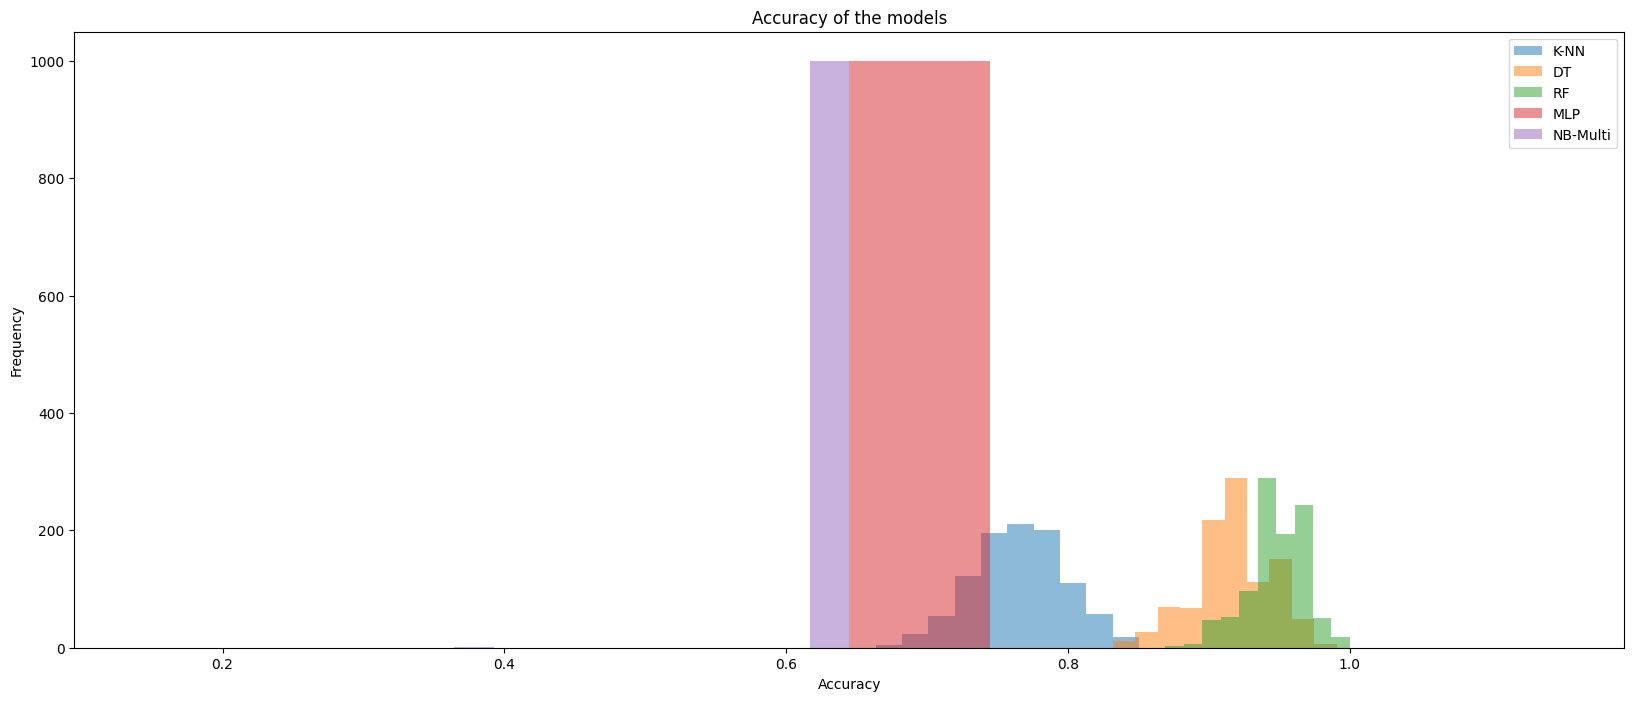

In [ ]:
#histogram for accuracy of above 5 classifiers

plt.figure(figsize=(20,8))
plt.hist(accuracy_list_knn, bins=10, alpha=0.5, label='K-NN')
plt.hist(accuracy_list_dt, bins=10, alpha=0.5, label='DT')
plt.hist(accuracy_list_rf, bins=10, alpha=0.5, label='RF')
plt.hist(accuracy_list_mlp, bins=10, alpha=0.5, label='MLP')
plt.hist(accuracy_list_NB_multi, bins=10, alpha=0.5, label='NB-Multi')
plt.legend(loc='upper right')
plt.title('Accuracy of the models')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

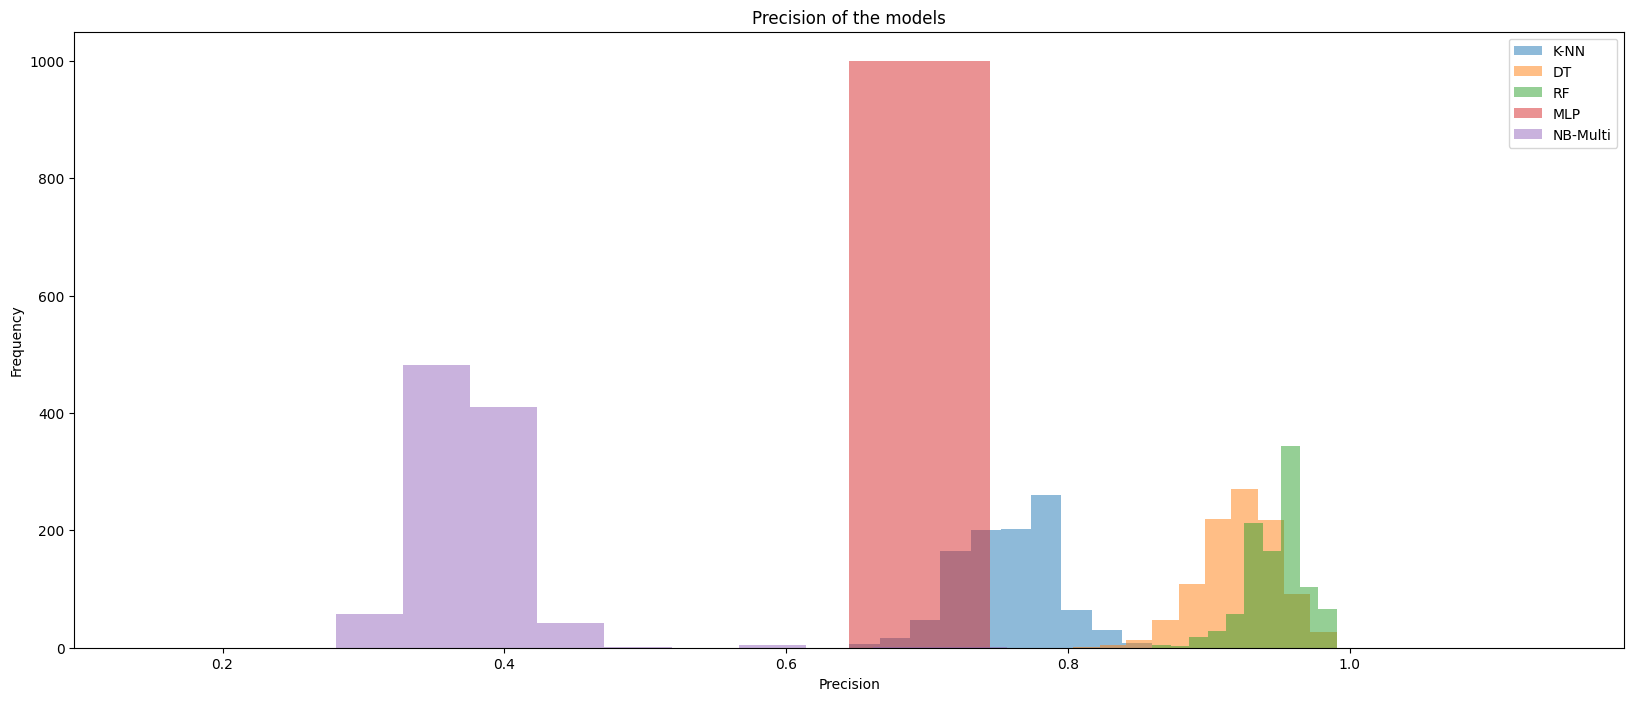

In [ ]:
#histogram for precision of above 5 classifiers

plt.figure(figsize=(20,8))
plt.hist(precision_list_knn, bins=10, alpha=0.5, label='K-NN')
plt.hist(precision_list_dt, bins=10, alpha=0.5, label='DT')
plt.hist(precision_list_rf, bins=10, alpha=0.5, label='RF')
plt.hist(precision_list_mlp, bins=10, alpha=0.5, label='MLP')
plt.hist(precision_list_NB_multi, bins=10, alpha=0.5, label='NB-Multi')
plt.legend(loc='upper right')
plt.title('Precision of the models')
plt.xlabel('Precision')
plt.ylabel('Frequency')
plt.show()

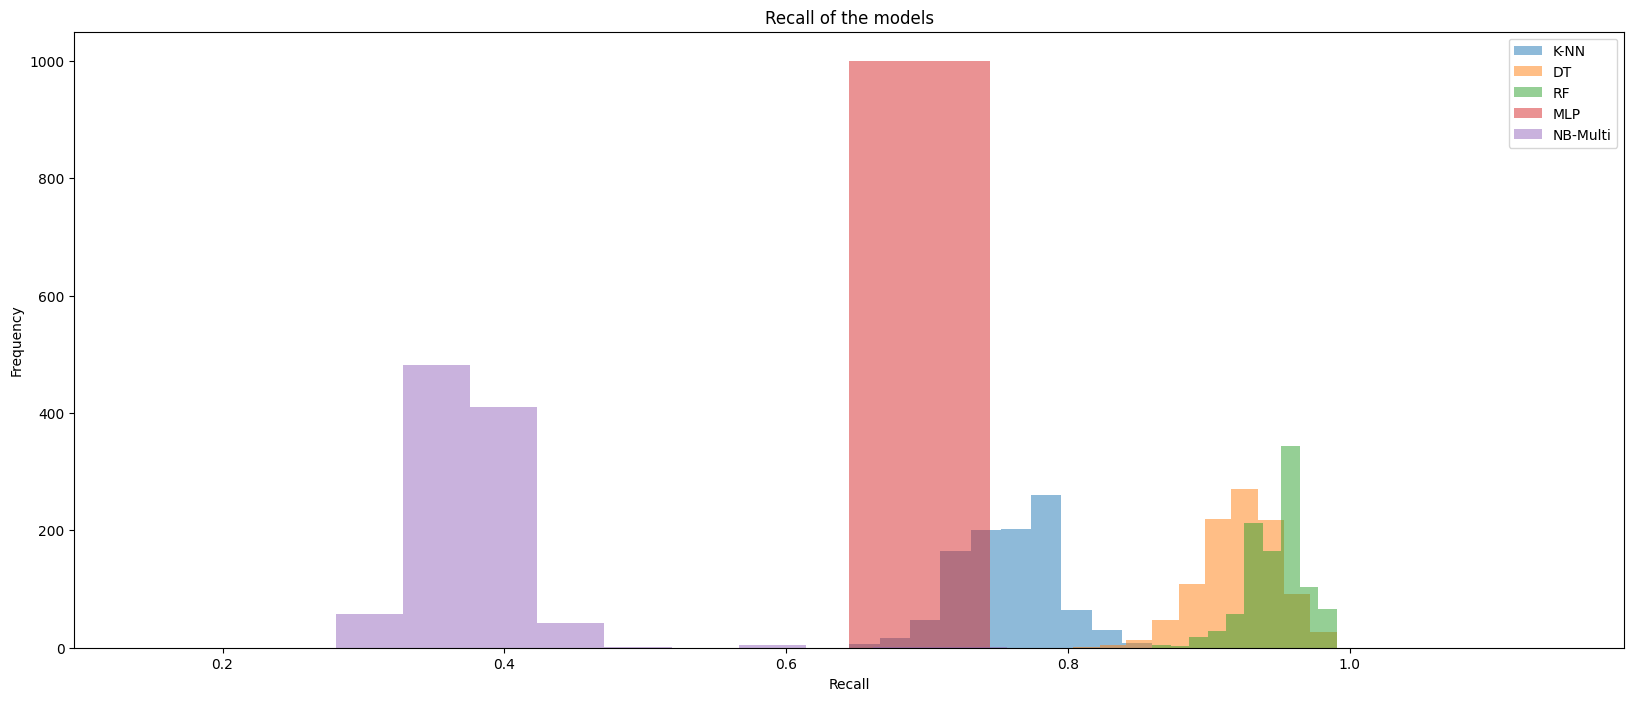

In [ ]:
#histogram for recall of above 5 classifiers

plt.figure(figsize=(20,8))
plt.hist(recall_list_knn, bins=10, alpha=0.5, label='K-NN')
plt.hist(recall_list_dt, bins=10, alpha=0.5, label='DT')
plt.hist(recall_list_rf, bins=10, alpha=0.5, label='RF')
plt.hist(recall_list_mlp, bins=10, alpha=0.5, label='MLP')
plt.hist(recall_list_NB_multi, bins=10, alpha=0.5, label='NB-Multi')
plt.legend(loc='upper right')
plt.title('Recall of the models')
plt.xlabel('Recall')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#testing for normality (highest performing 2)

alpha = 0.05

#Random Forest

print("RF normality test")
stat, p = shapiro(accuracy_list_rf)
print("Shapiro : W = %0.2f, p-value = %0.2f" % (stat, p))
if p < alpha:
  print("RF - distribution does not appear to be normal")

else:
  print("RF - distribution does appear to be normal")

#MLP

print("MLP normality test")
stat, p = shapiro(accuracy_list_mlp)
print("Shapiro : W = %0.2f, p-value = %0.2f" % (stat, p))
if p < alpha:
  print("MLP - distribution does not appear to be normal")

else:
  print("MLP - distribution does appear to be normal")


RF normality test
Shapiro : W = 0.97, p-value = 0.00
 - distribution does not appear to be normal
MLP normality test
Shapiro : W = 1.00, p-value = 1.00
 n- distribution does appear to be normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
#signifiance testing

alpha = 0.05

#Random forest

stat, p = mannwhitneyu(accuracy_list_rf, accuracy_list_mlp)

if p < alpha:
  print(" RF - peformance difference appears significant")

else:
  print(" RF - performace difference is not significant ")

#MLP

stat, p = ttest_ind(accuracy_list_rf, accuracy_list_mlp)

if p < alpha:
  print(" MLP - peformance difference appears significant")

else:
  print(" MLP - performace difference is not significant ")





 RF - peformance difference appears significant
 MLP - peformance difference appears significant


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
